### Problem Statement: Airbnb Price Prediction

The objective of this project is to develop a machine learning model to predict the price of Airbnb listings based on various features provided in the dataset. By accurately predicting the price of Airbnb properties, hosts can set competitive prices, and guests can make informed decisions while booking accommodations. This project aims to assist both hosts and guests in the Airbnb ecosystem.

---

### Column Dictionary:

1. **id**: Unique identifier for each Airbnb listing.
2. **log_price**: The natural logarithm of the price of the listing (target variable).
3. **property_type**: Type of property (e.g., apartment, house, condo, etc.).
4. **room_type**: Type of room available for booking (e.g., entire home/apt, private room, shared room).
5. **amenities**: List of amenities offered with the listing (e.g., Wi-Fi, kitchen, TV, etc.).
6. **accommodates**: Number of guests the listing can accommodate.
7. **bathrooms**: Number of bathrooms in the listing.
8. **bed_type**: Type of bed provided (e.g., real bed, sofa bed, pull-out sofa, etc.).
9. **cancellation_policy**: Policy regarding cancellation of bookings by guests.
10. **cleaning_fee**: Indicates whether cleaning fee is charged for the booking.
11. **latitude**: Latitude coordinates of the listing location.
12. **longitude**: Longitude coordinates of the listing location.
13. **name**: Name or title of the listing.
14. **neighbourhood**: Neighbourhood where the listing is located.
15. **number_of_reviews**: Number of reviews received for the listing.
16. **review_scores_rating**: Overall rating score of the listing based on guest reviews.
17. **thumbnail_url**: URL of the thumbnail image of the listing.
18. **zipcode**: Zip code of the listing location.
19. **bedrooms**: Number of bedrooms in the listing.
20. **bed**: Type of bed provided in the listing (e.g., king, queen, double, single, etc.).

---

This project involves building a regression model using various machine learning algorithms to predict the log price of Airbnb listings based on the provided features. The model will be trained on historical Airbnb data and evaluated based on its predictive performance.


## Importing Liabraries And Loading The Data

In [117]:
# Ignore warnings
import warnings
warnings.simplefilter('ignore')

# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from catboost import CatBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from tabulate import tabulate

In [118]:
# read the data
df=pd.read_csv('./train.csv')
# top 5 rows
df.head()

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,...,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,...,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,...,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,...,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117.0,2.0,2.0
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,...,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0


In [119]:
def check_dataset(df):
    # Null values
    null_values = df.isnull().sum()
    print("~Null Values~")
    print(tabulate(null_values.to_frame(), headers=['Column', 'Null Count'], tablefmt='pretty'))
    print("\n" + "~" * 50 + "\n")

    # Shape
    shape = df.shape
    print("~Shape~")
    print(tabulate(pd.DataFrame({'Rows': [shape[0]], 'Columns': [shape[1]]}), headers='keys', tablefmt='pretty'))
    print("\n" + "~" * 50 + "\n")

    # Duplicates
    duplicates = df.duplicated().sum()
    print("~Duplicates~")
    print(tabulate(pd.DataFrame({'Duplicates Count': [duplicates]}), headers='keys', tablefmt='pretty'))
    print("\n" + "~" * 50 + "\n")

    # Info
    print("~Info~")
    print(df.info())
    print("\n" + "~" * 50 + "\n")

    # Data types
    dtypes = df.dtypes
    print("~Data Types~")
    print(tabulate(dtypes.to_frame(), headers=['Column', 'Data Type'], tablefmt='pretty'))
    print("\n" + "~" * 50 + "\n")

    # Column-wise value counts
    print("~Column-wise Value Counts~")
    for col in df.columns:
        print(f"\n{col}:")
        print(df[col].value_counts())
        print("\n" + "~" * 30)


# Example usage:
check_dataset(df)


~Null Values~
+------------------------+------------+
|         Column         | Null Count |
+------------------------+------------+
|           id           |     0      |
|       log_price        |     0      |
|     property_type      |     0      |
|       room_type        |     0      |
|       amenities        |     0      |
|      accommodates      |     0      |
|       bathrooms        |    200     |
|        bed_type        |     0      |
|  cancellation_policy   |     0      |
|      cleaning_fee      |     0      |
|          city          |     0      |
|      description       |     0      |
|      first_review      |   15864    |
|  host_has_profile_pic  |    188     |
| host_identity_verified |    188     |
|   host_response_rate   |   18299    |
|       host_since       |    188     |
|    instant_bookable    |     0      |
|      last_review       |   15827    |
|        latitude        |     0      |
|       longitude        |     0      |
|          name          |

### Deep Dive To Explore Above Things One By One

In [120]:
# shape of The Data
df.shape

(74111, 29)

In [121]:
# null values
print('The Column wise Missing value percentage \n', (df.isnull().sum()/len(df))*100)

The Column wise Missing value percentage 
 id                         0.000000
log_price                  0.000000
property_type              0.000000
room_type                  0.000000
amenities                  0.000000
accommodates               0.000000
bathrooms                  0.269865
bed_type                   0.000000
cancellation_policy        0.000000
cleaning_fee               0.000000
city                       0.000000
description                0.000000
first_review              21.405729
host_has_profile_pic       0.253674
host_identity_verified     0.253674
host_response_rate        24.691341
host_since                 0.253674
instant_bookable           0.000000
last_review               21.355804
latitude                   0.000000
longitude                  0.000000
name                       0.000000
neighbourhood              9.272578
number_of_reviews          0.000000
review_scores_rating      22.563452
thumbnail_url             11.086074
zipcode              

<Axes: >

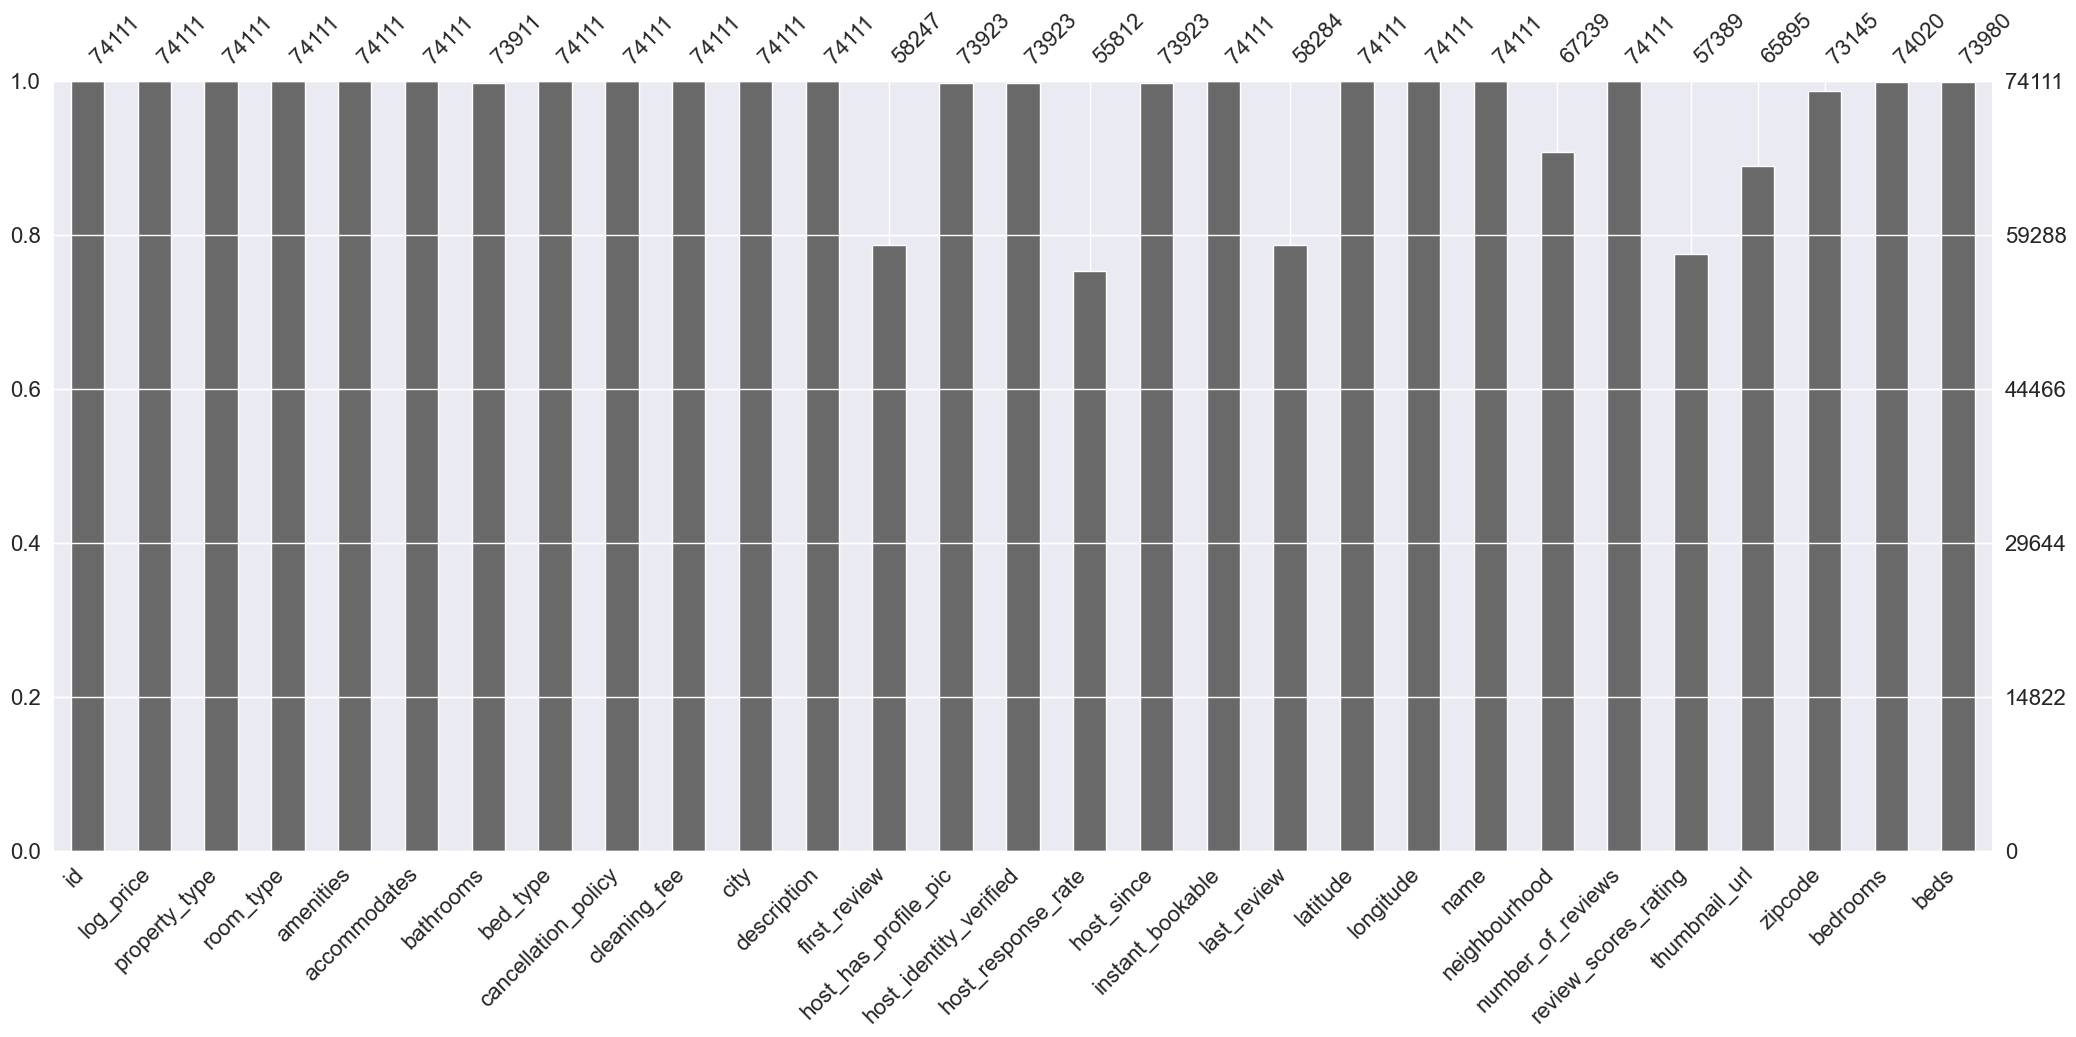

In [122]:
import missingno as msn
msn.bar(df)


In [123]:
# sum of Duplicates
df.duplicated().sum()

0

In [124]:
# columns in Data Set

for col in df.columns:
    print(col)

id
log_price
property_type
room_type
amenities
accommodates
bathrooms
bed_type
cancellation_policy
cleaning_fee
city
description
first_review
host_has_profile_pic
host_identity_verified
host_response_rate
host_since
instant_bookable
last_review
latitude
longitude
name
neighbourhood
number_of_reviews
review_scores_rating
thumbnail_url
zipcode
bedrooms
beds


In [125]:
# datatpes of columns
df.dtypes

id                          int64
log_price                 float64
property_type              object
room_type                  object
amenities                  object
accommodates                int64
bathrooms                 float64
bed_type                   object
cancellation_policy        object
cleaning_fee                 bool
city                       object
description                object
first_review               object
host_has_profile_pic       object
host_identity_verified     object
host_response_rate         object
host_since                 object
instant_bookable           object
last_review                object
latitude                  float64
longitude                 float64
name                       object
neighbourhood              object
number_of_reviews           int64
review_scores_rating      float64
thumbnail_url              object
zipcode                    object
bedrooms                  float64
beds                      float64
dtype: object

In [126]:
#  5 Point Summary
df.describe()

,id,log_price,accommodates,bathrooms,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds
count,7.411100e+04,74111.000000,74111.000000,73911.000000,74111.000000,74111.000000,74111.000000,57389.000000,74020.000000,73980.000000
mean,1.126662e+07,4.782069,3.155146,1.235263,38.445958,-92.397525,20.900568,94.067365,1.265793,1.710868
std,6.081735e+06,0.717394,2.153589,0.582044,3.080167,21.705322,37.828641,7.836556,0.852143,1.254142
min,3.440000e+02,0.000000,1.000000,0.000000,33.338905,-122.511500,0.000000,20.000000,0.000000,0.000000
25%,6.261964e+06,4.317488,2.000000,1.000000,34.127908,-118.342374,1.000000,92.000000,1.000000,1.000000
50%,1.225415e+07,4.709530,2.000000,1.000000,40.662138,-76.996965,6.000000,96.000000,1.000000,1.000000
75%,1.640226e+07,5.220356,4.000000,1.000000,40.746096,-73.954660,23.000000,100.000000,1.000000,2.000000
max,2.123090e+07,7.600402,16.000000,8.000000,42.390437,-70.985047,605.000000,100.000000,10.000000,18.000000


In [127]:
# imputing Missing Values
df.last_review.fillna(method="ffill",inplace=True)
df.first_review.fillna(method="ffill",inplace=True)
df.host_since.fillna(method="ffill",inplace=True)

<Axes: xlabel='bathrooms', ylabel='Density'>

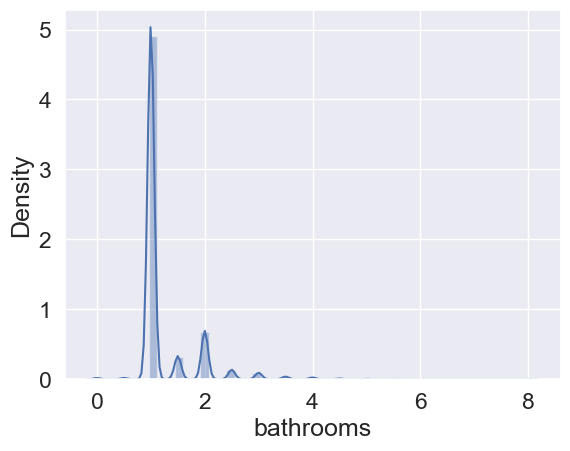

In [128]:
sns.distplot(df["bathrooms"])

In [129]:
df["bathrooms"] = df['bathrooms'].fillna(round(df["bathrooms"].median()))

<Axes: xlabel='review_scores_rating', ylabel='Density'>

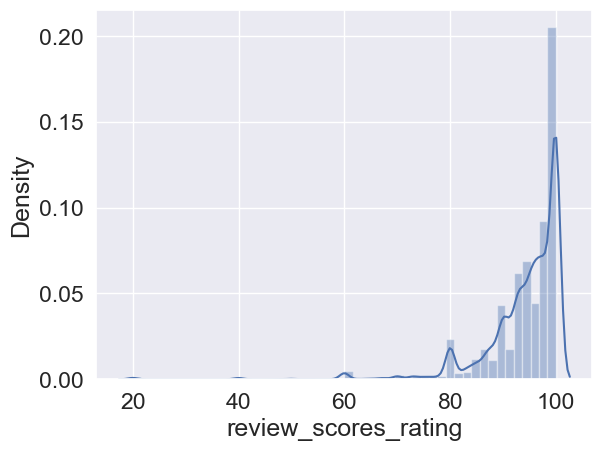

In [130]:
sns.distplot(df["review_scores_rating"])

In [131]:
df["review_scores_rating"] = df["review_scores_rating"].fillna(0)

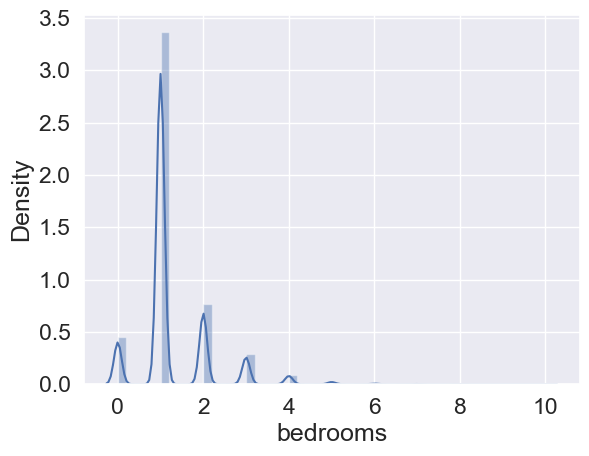

In [132]:
sns.distplot(df["bedrooms"])
plt.show()

In [133]:
df["bedrooms"] = df['bedrooms'].fillna((df["bathrooms"].median()))

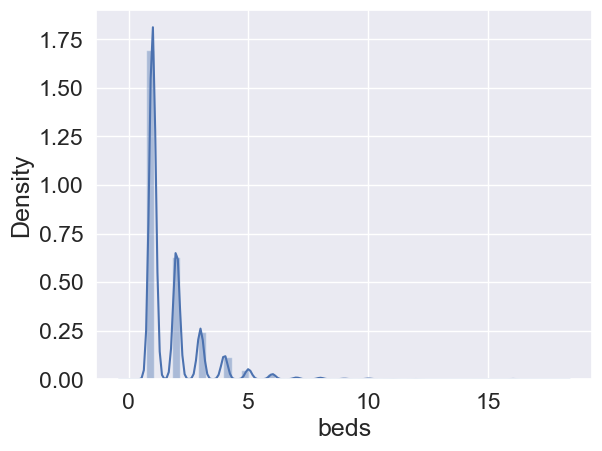

In [134]:
sns.distplot(df["beds"])
plt.show()

In [135]:
df["beds"] = df["beds"].fillna((df["bathrooms"].median()))

In [136]:
amenities_count = []
for i in df["amenities"]:
    amenities_count.append(len(i))
    
df["amenities"] = amenities_count

In [137]:
# Function to plot catplot graphs
def plot_catplot(h,v,he,a):
    sns.set(font_scale=1.5)
    sns.catplot(x=h,kind=v,data=df,height=he, aspect = a)
    
# Function to plot catplot graphs
def plot_piechart(h):
    sns.set(font_scale=1.5)
    fig = plt.figure(figsize=(5,5))
    ax = fig.add_axes([0,0,1,1])
    ax.axis('equal')
    langs = list(df[h].unique())
    students =list(df[h].value_counts())
    ax.pie(students, labels = langs,autopct='%1.2f%%')
    plt.show()

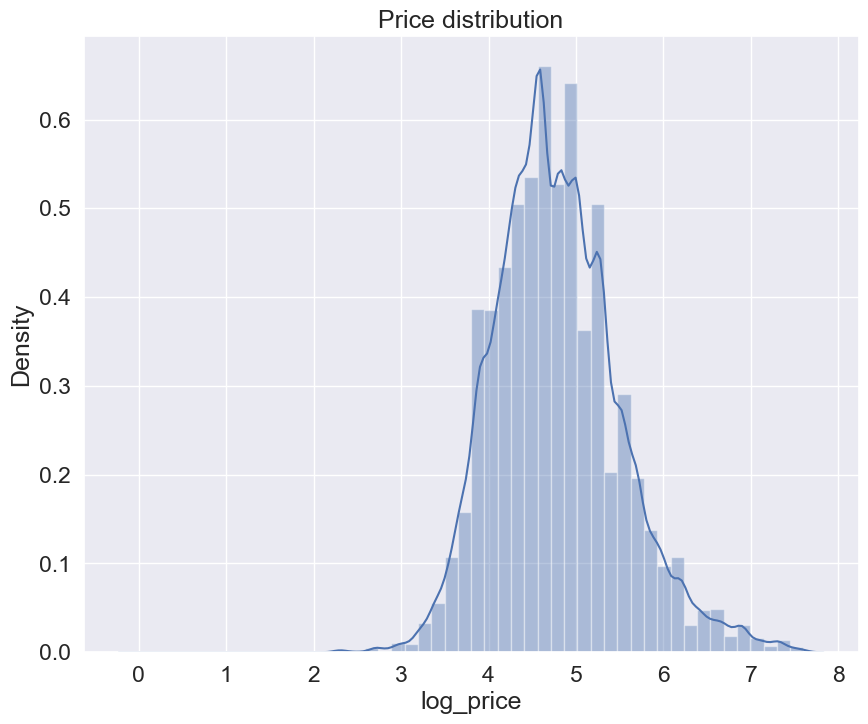

In [138]:
plt.figure(figsize = (10, 8))
sns.distplot(df["log_price"])
plt.title('Price distribution')
plt.show()

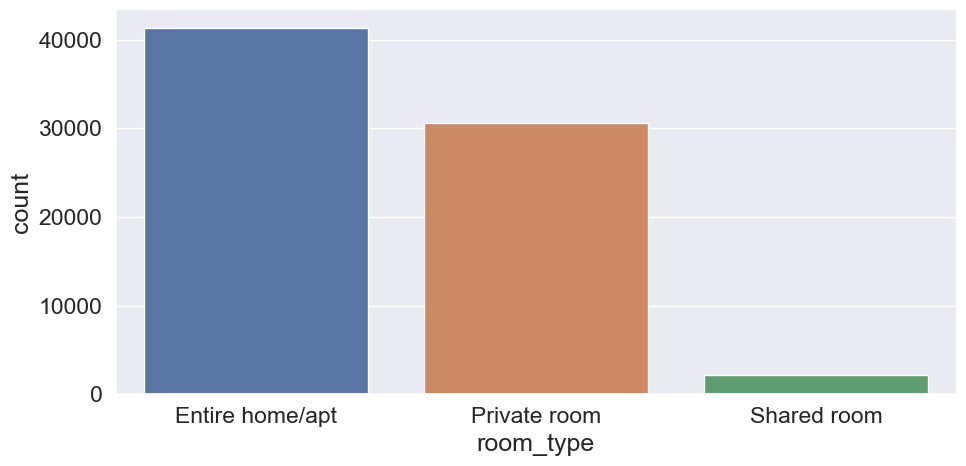

In [139]:
plot_catplot("room_type", "count", 5, 2)

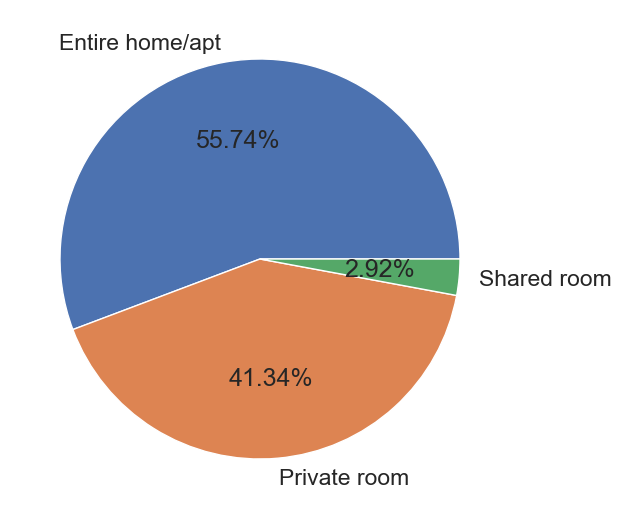

In [140]:
plot_piechart("room_type") 

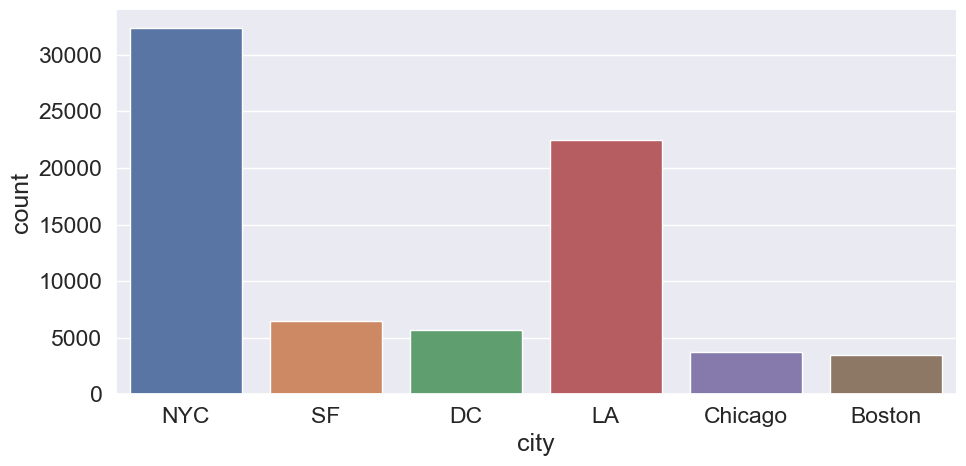

In [141]:
plot_catplot("city","count", 5, 2)

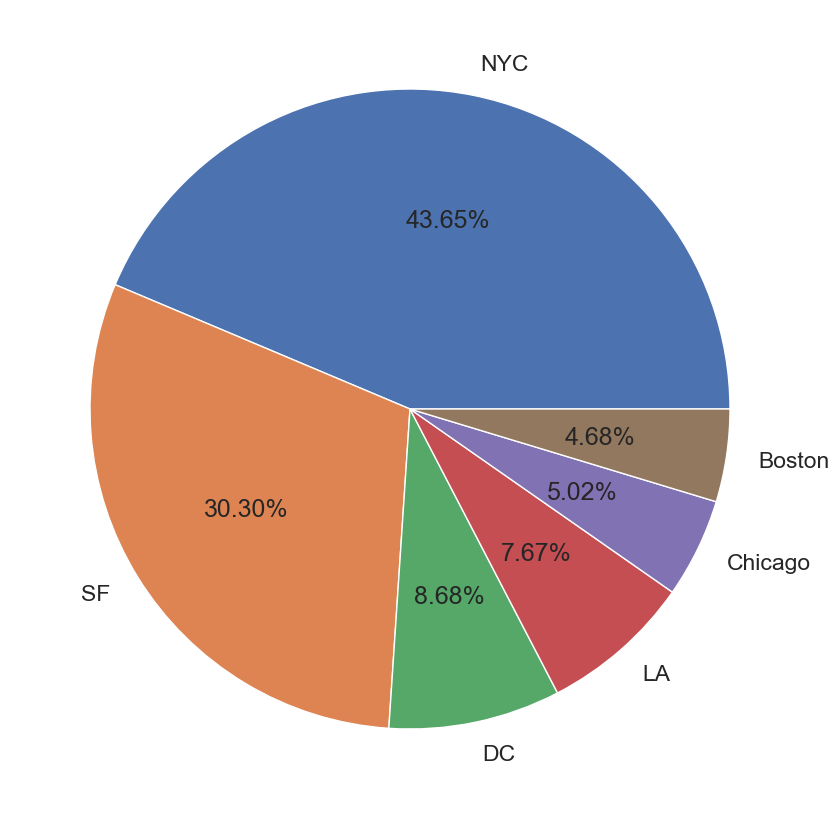

In [142]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
langs = list(df.city.unique())
students =list(df.city.value_counts())
ax.pie(students, labels = langs,autopct='%1.2f%%')
plt.show()

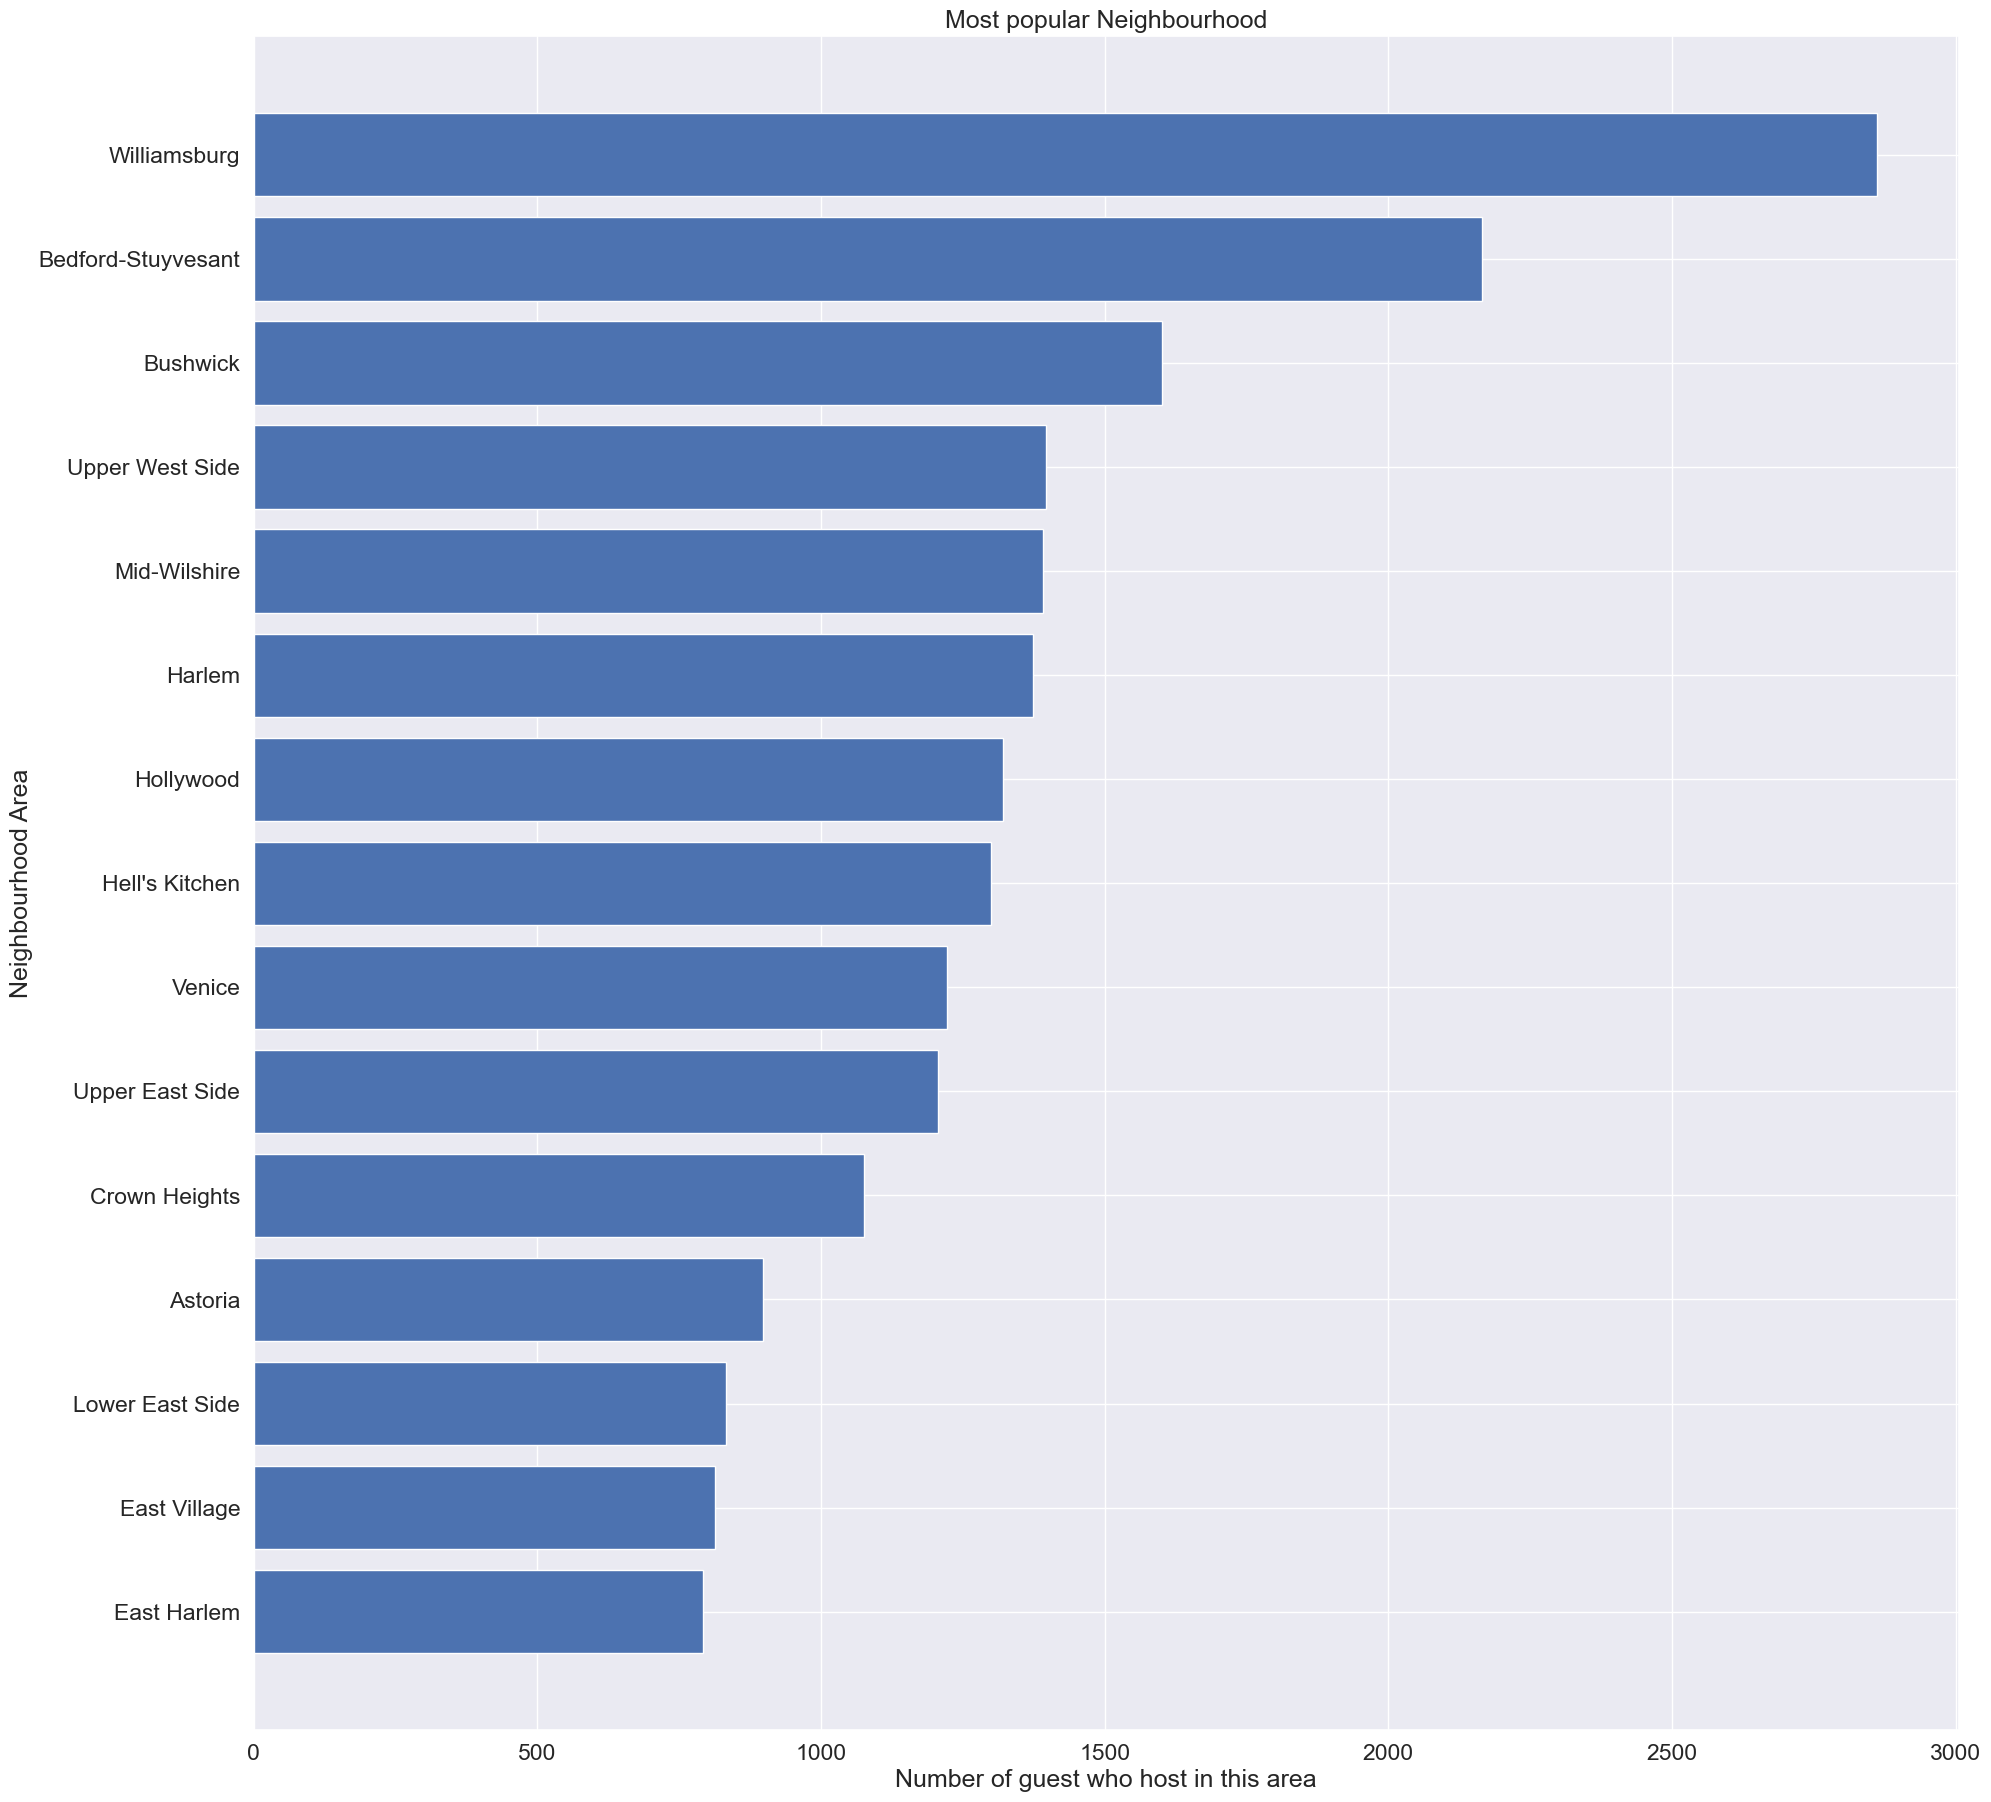

In [143]:
data = df.neighbourhood.value_counts()[:15]
plt.figure(figsize=(22,22))
x = list(data.index)
y = list(data.values)
x.reverse()
y.reverse()

plt.title("Most popular Neighbourhood")
plt.ylabel("Neighbourhood Area")
plt.xlabel("Number of guest who host in this area")

plt.barh(x,y)
plt.show()

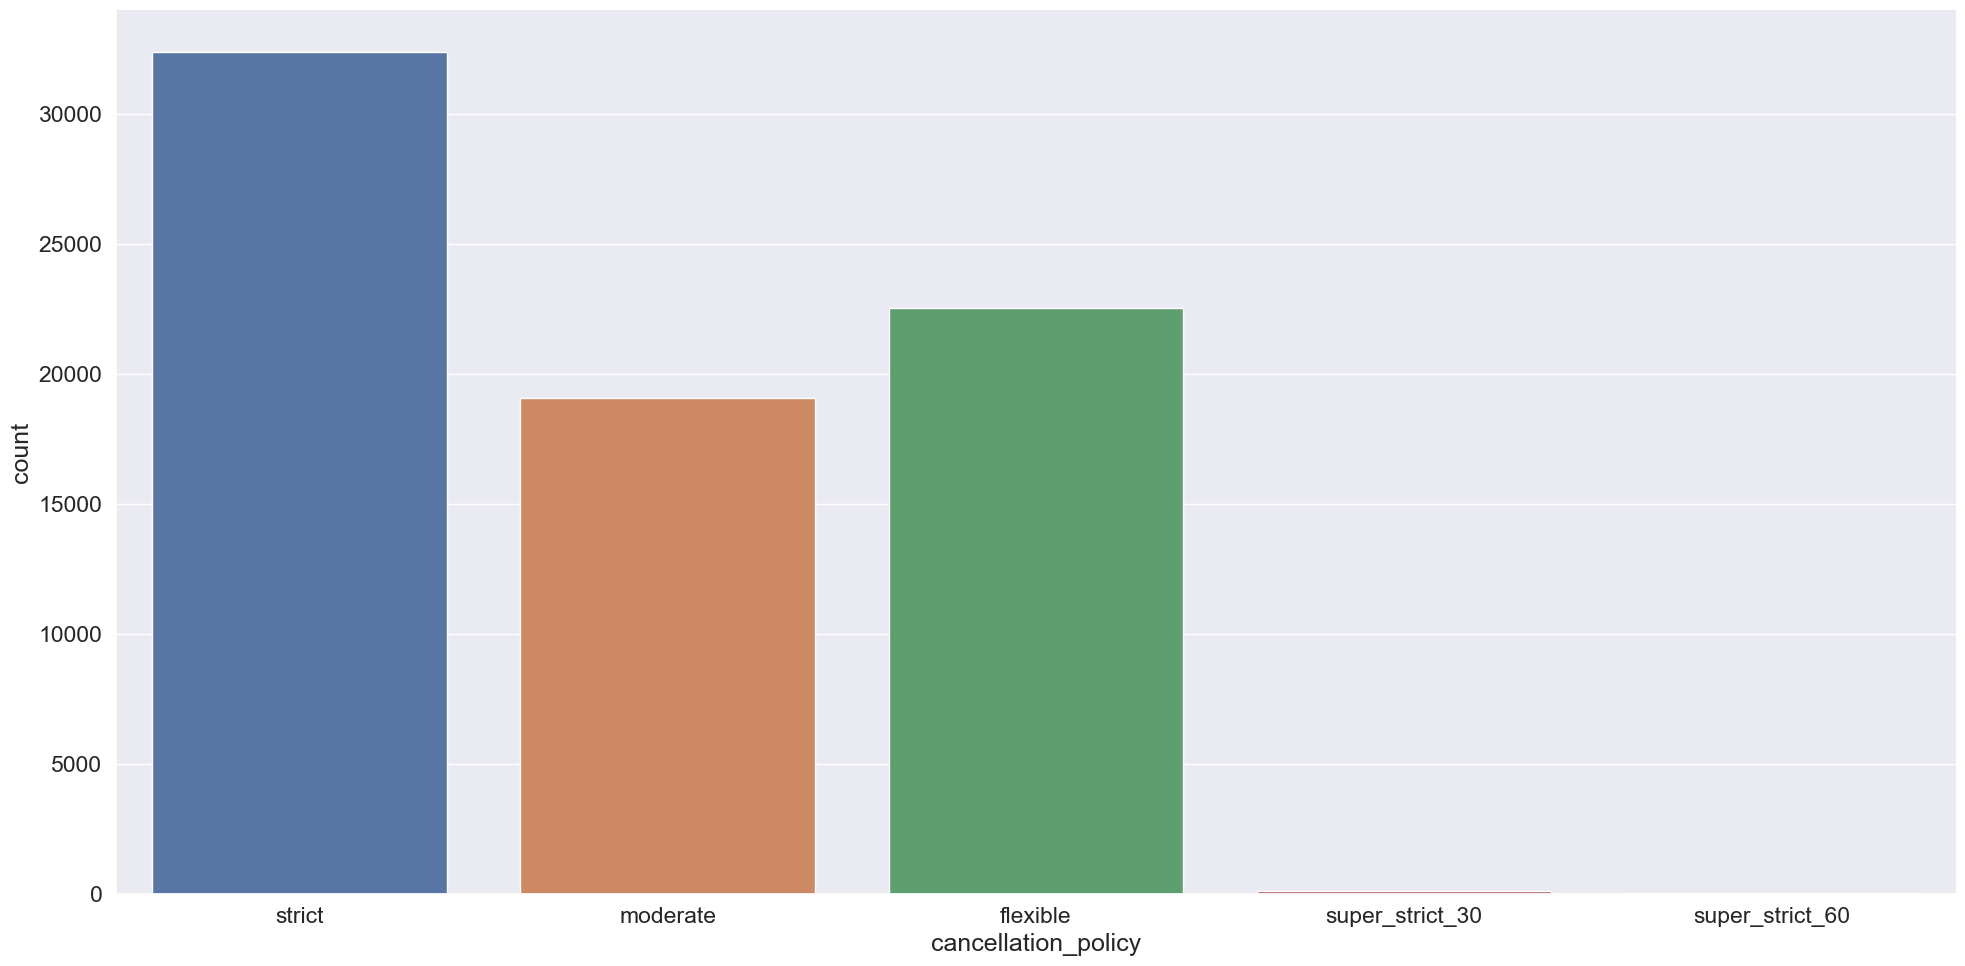

In [144]:
plot_catplot("cancellation_policy","count",10, 2)

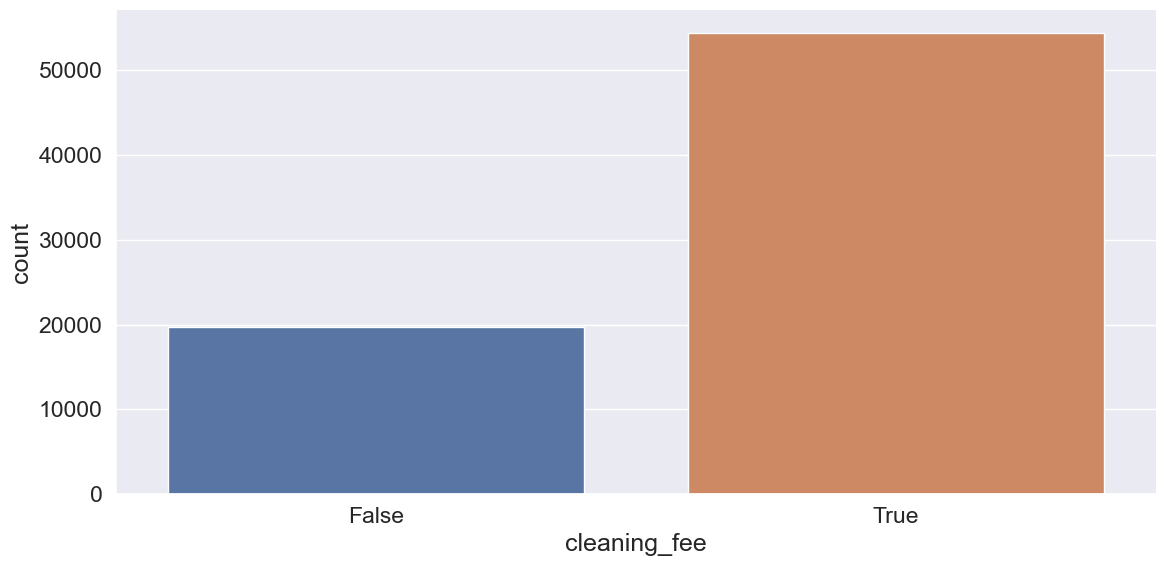

In [145]:
plot_catplot("cleaning_fee","count",6,2)

In [146]:
def plot_violinplot(h,v):
    plt.figure(figsize=(15,8))
    sns.set(font_scale=1.5)
    sns.violinplot(data=df, x=h, y=v, palette='GnBu_d')
    plt.title('Density and distribution of prices ', fontsize=15)
    plt.xlabel(h)
    plt.ylabel(v)

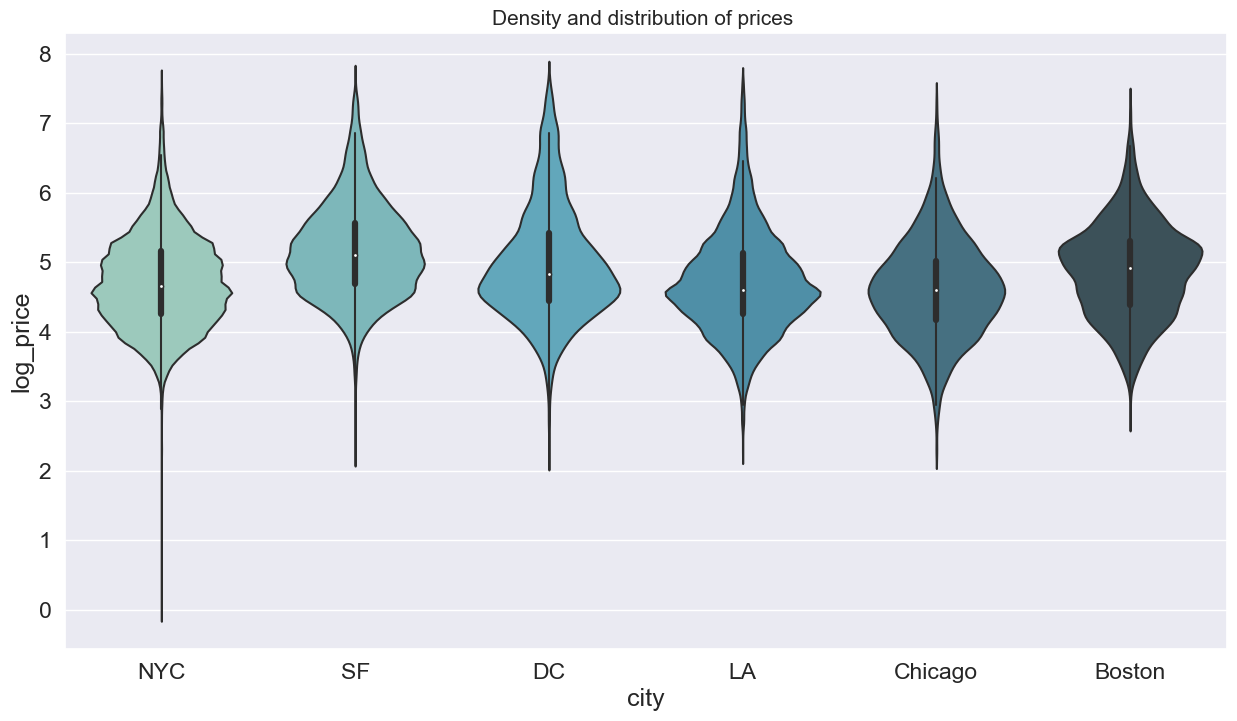

In [147]:
plot_violinplot("city","log_price")

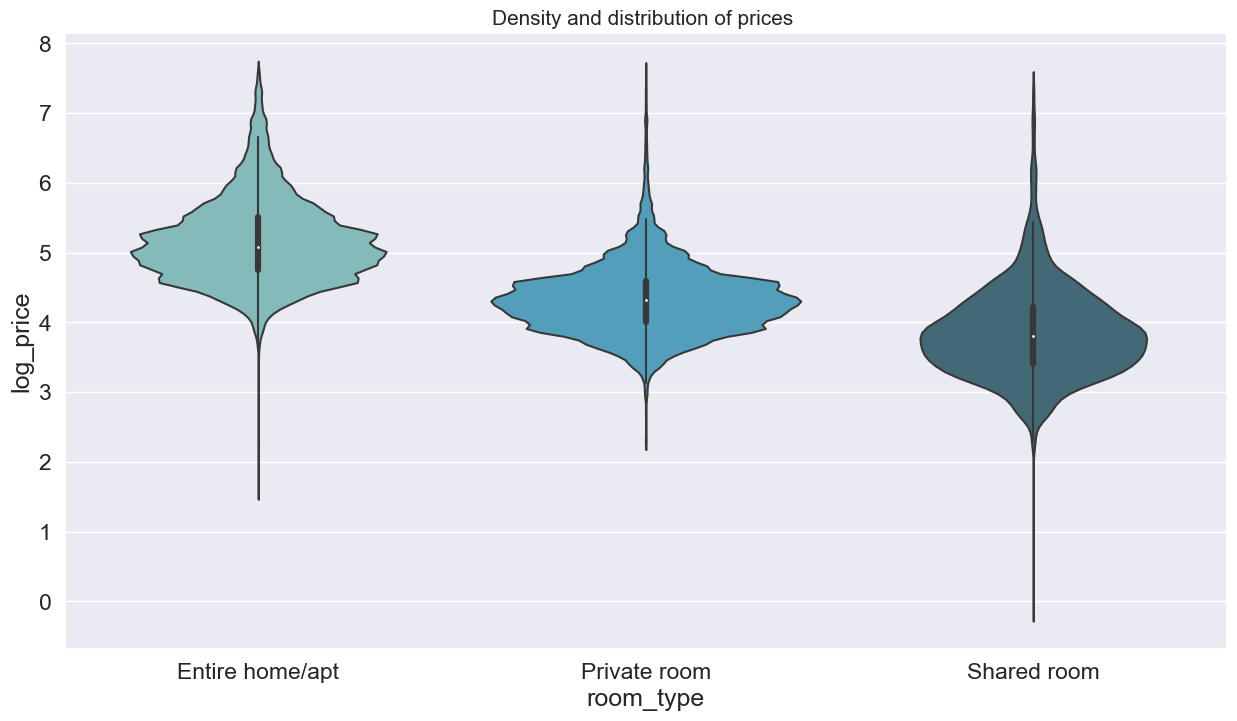

In [148]:
plot_violinplot("room_type","log_price")

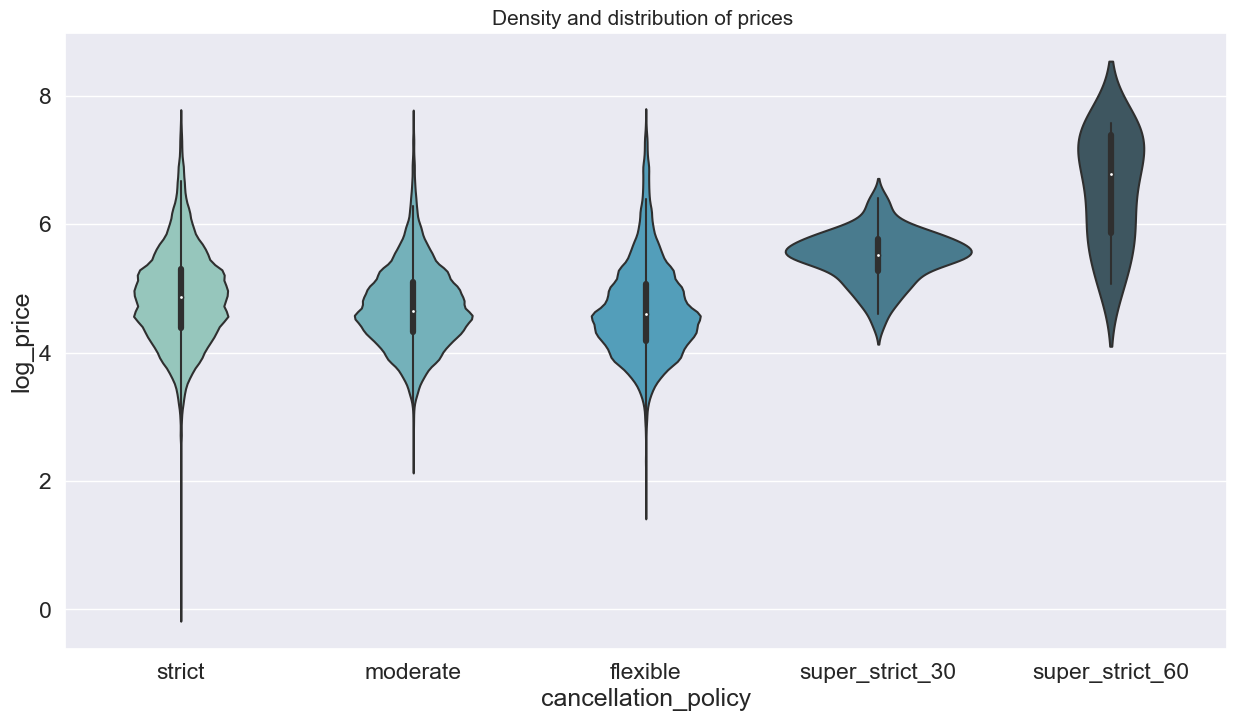

In [149]:
plot_violinplot("cancellation_policy","log_price")

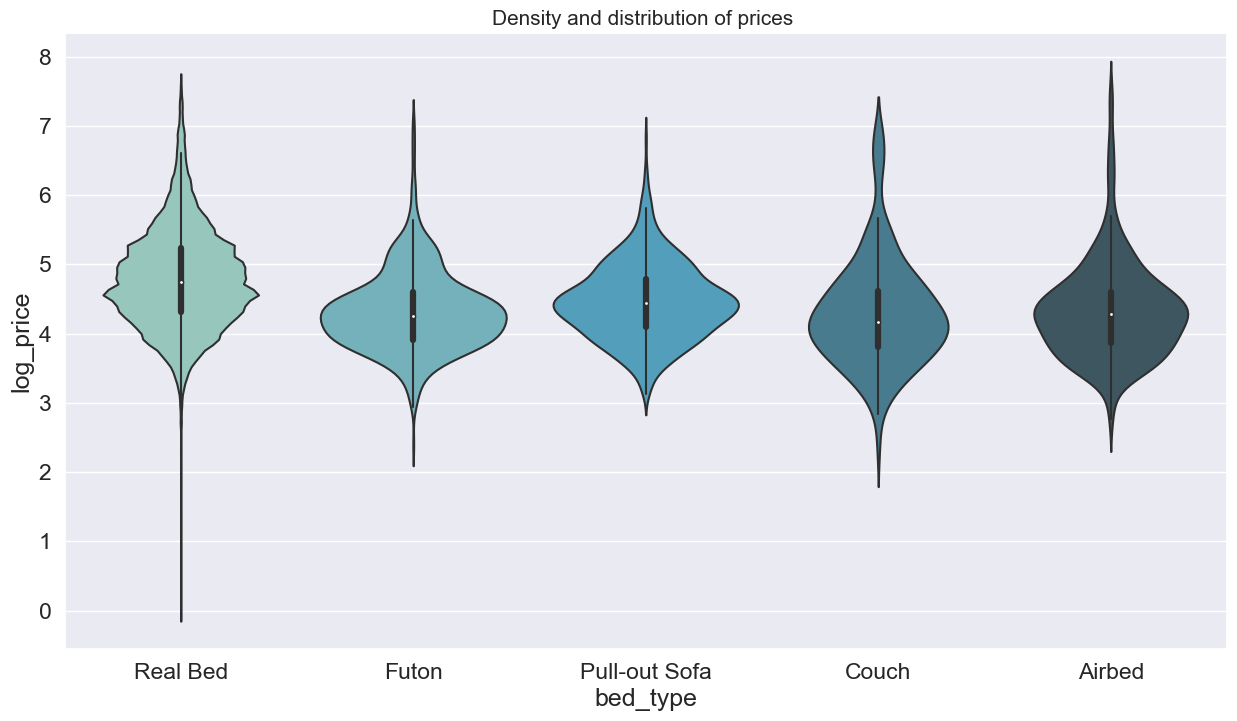

In [150]:
plot_violinplot("bed_type","log_price")

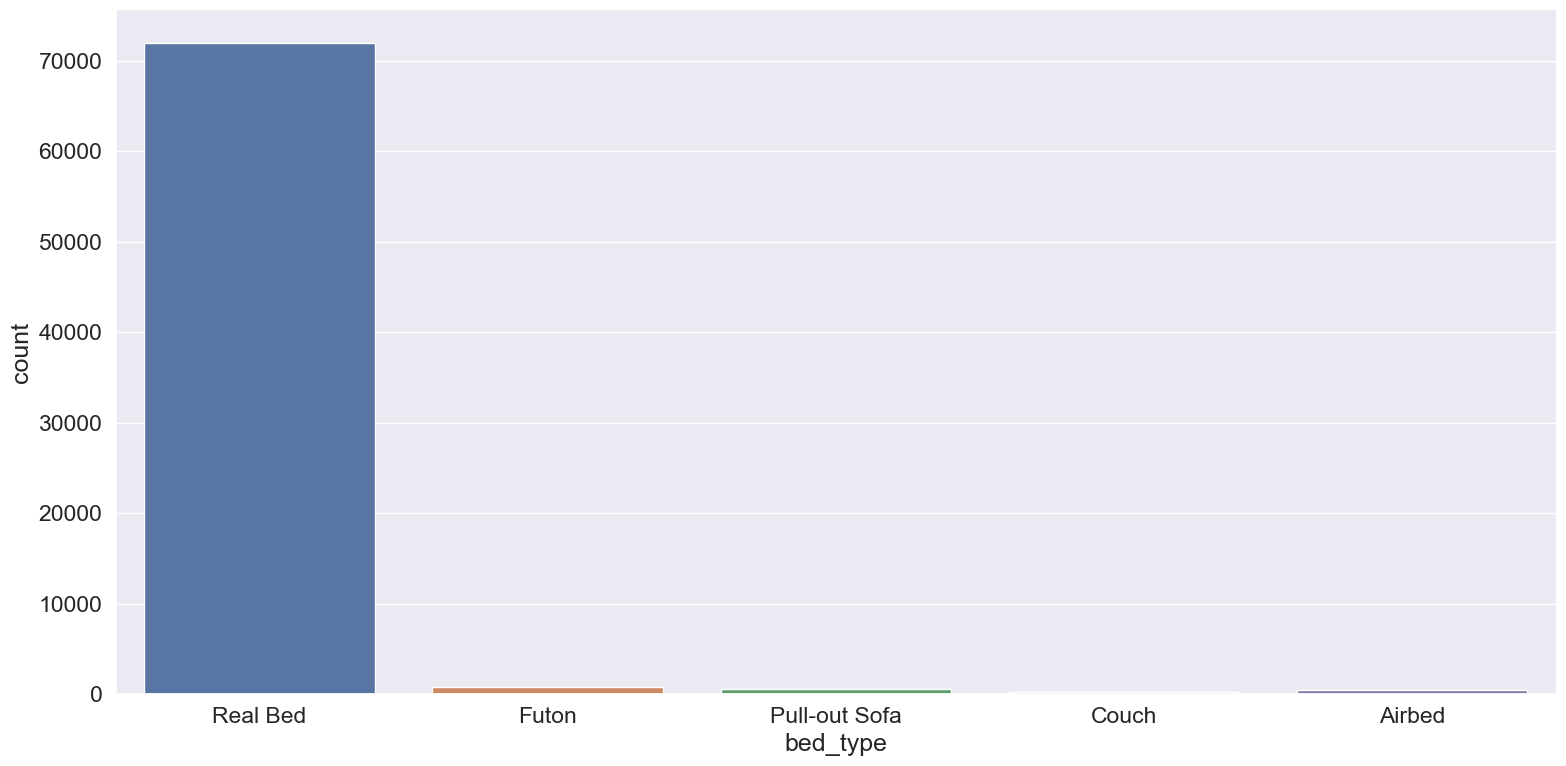

In [151]:
plot_catplot("bed_type","count",8, 2)

In [152]:
categorical_col = []
for column in df.columns:
    
    if df[column].dtypes != "float64" and df[column].dtypes != "int64":
        categorical_col.append(column)

In [153]:
categorical_col

['property_type',
 'room_type',
 'bed_type',
 'cancellation_policy',
 'cleaning_fee',
 'city',
 'description',
 'first_review',
 'host_has_profile_pic',
 'host_identity_verified',
 'host_response_rate',
 'host_since',
 'instant_bookable',
 'last_review',
 'name',
 'neighbourhood',
 'thumbnail_url',
 'zipcode']

In [154]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in categorical_col:
    df[col] = le.fit_transform(df[col])

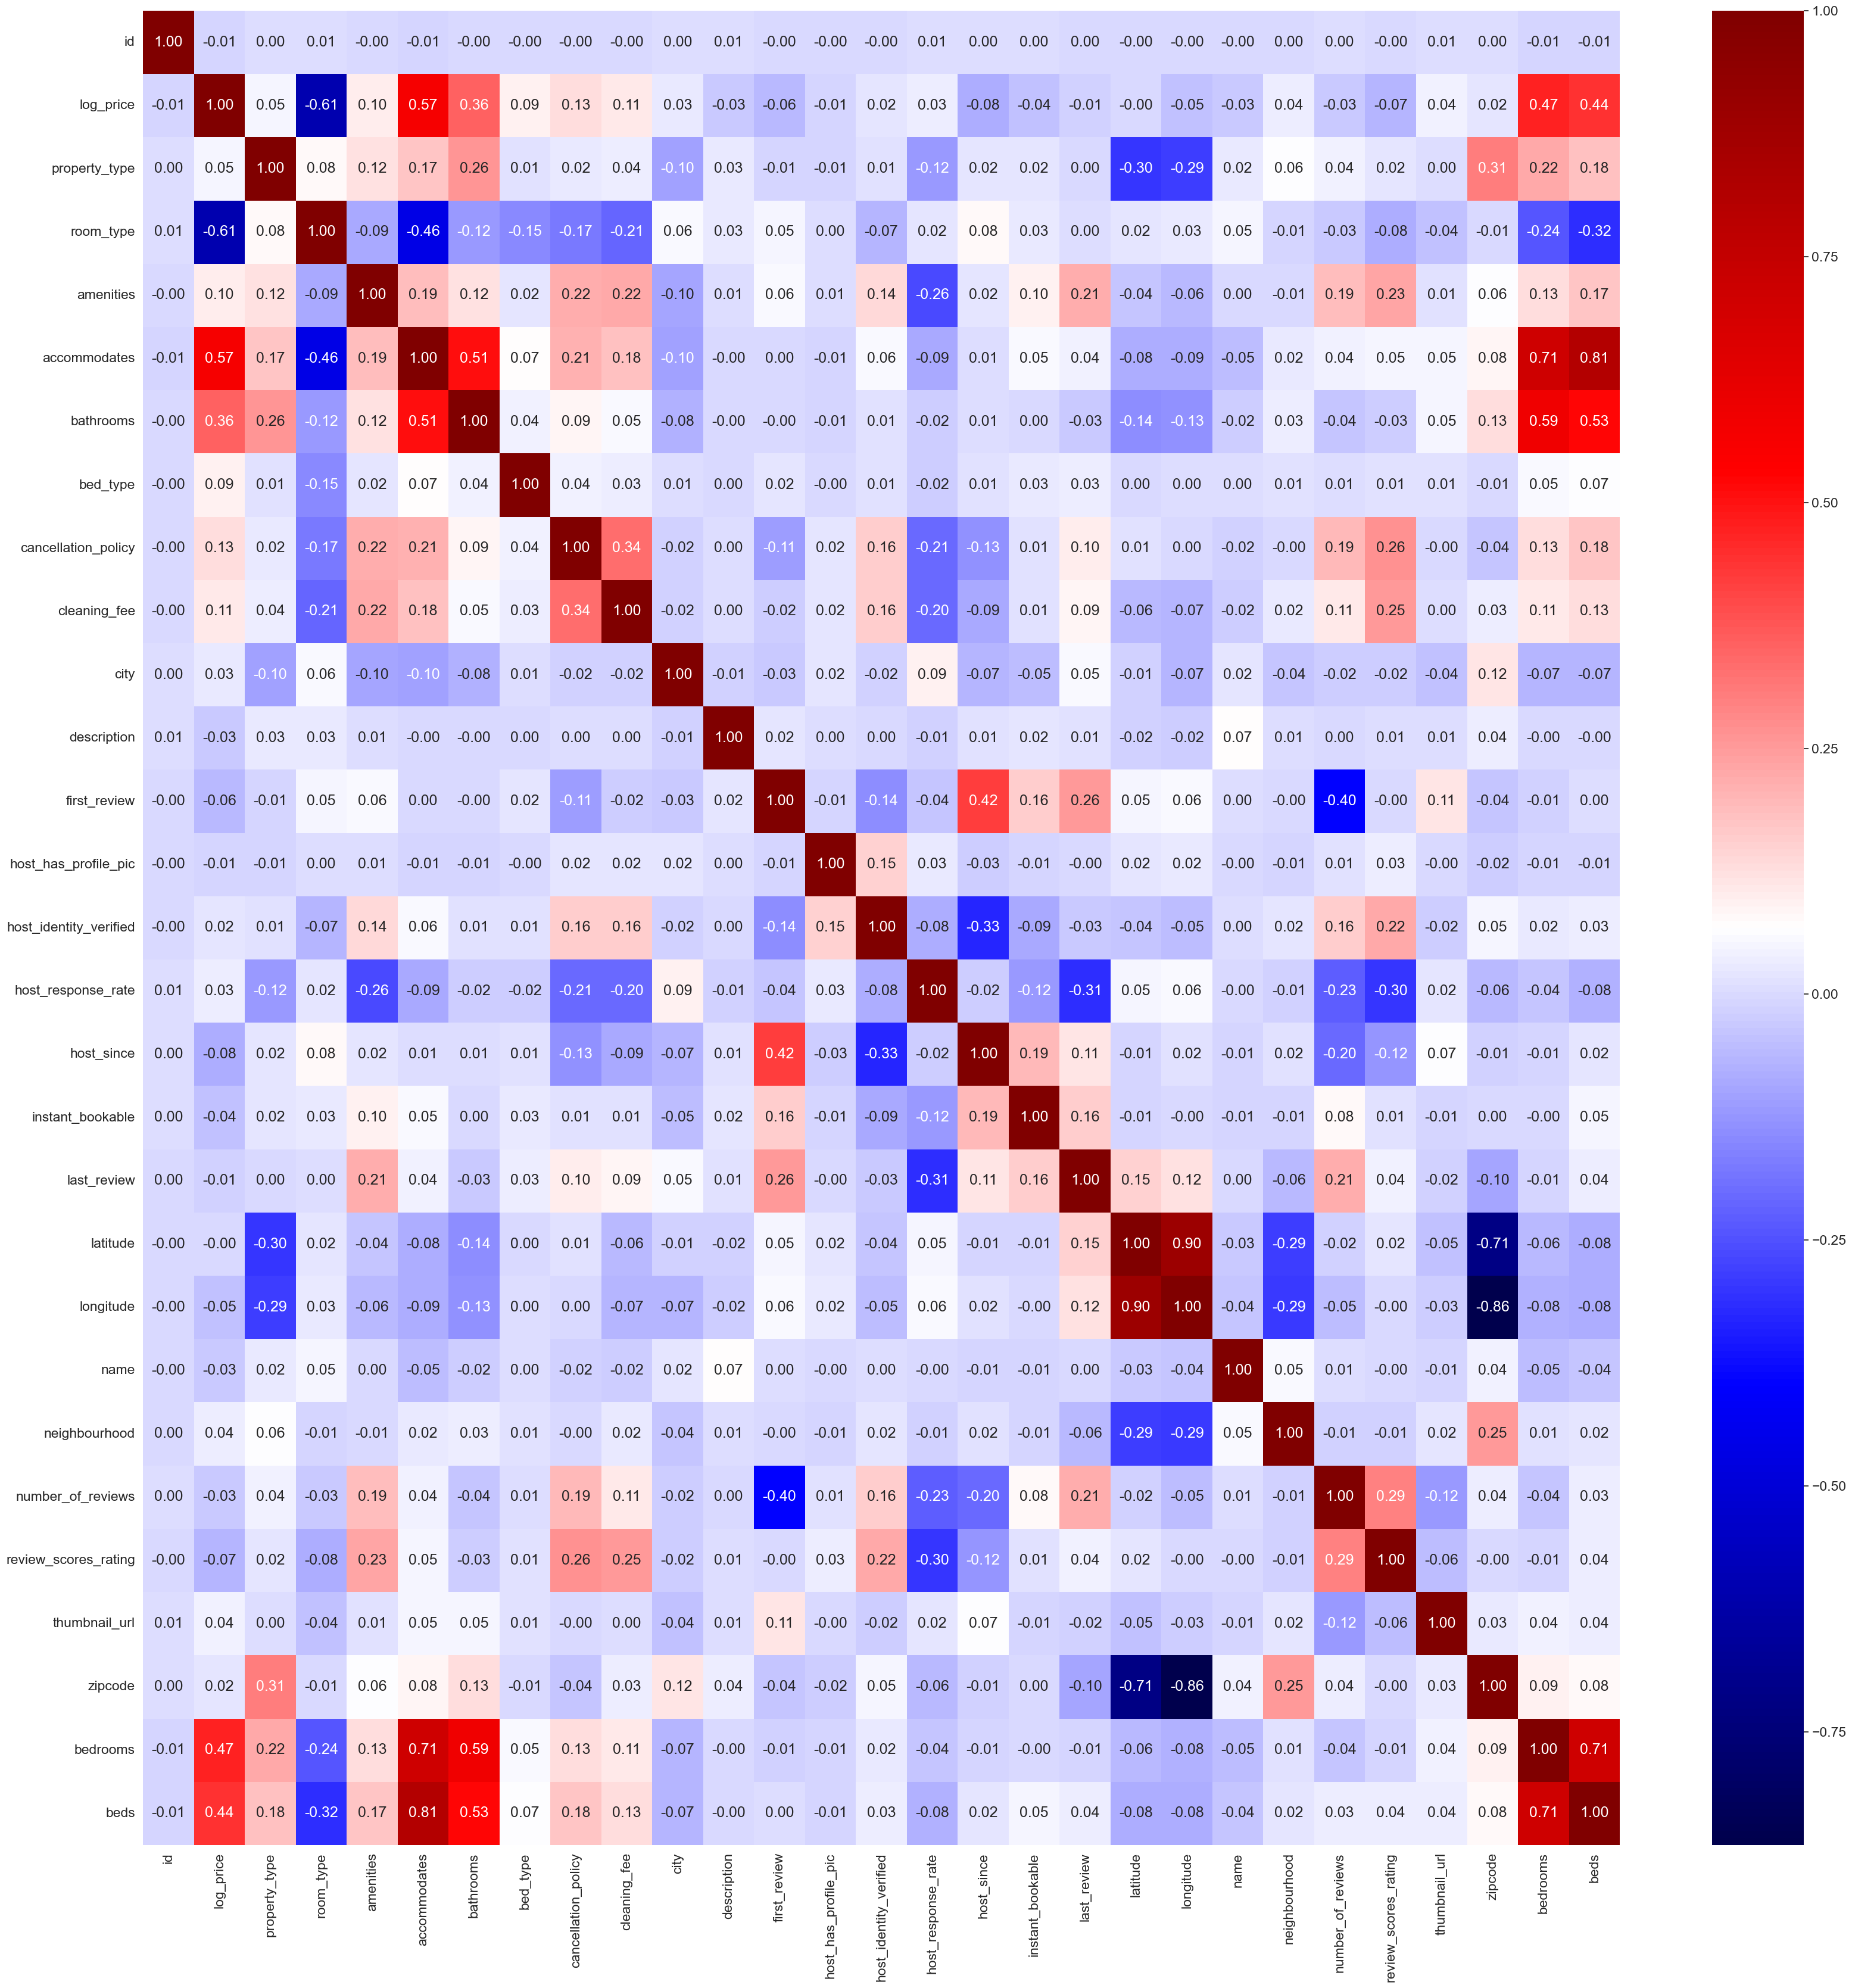

In [155]:
plt.figure(figsize = (40,40))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="seismic")
plt.show()

In [156]:
df

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,5.010635,0,0,152,3,1.0,4,2,1,...,40.696524,-73.991617,10464,77,2,100.0,32398,195,1.0,1.0
1,6304928,5.129899,0,0,218,7,1.0,4,2,1,...,40.766115,-73.989040,65672,252,6,93.0,16220,74,3.0,3.0
2,7919400,4.976734,0,0,311,5,1.0,4,1,1,...,40.808110,-73.943756,66396,247,10,92.0,32852,84,1.0,3.0
3,13418779,6.620073,17,0,210,4,1.0,4,0,1,...,37.772004,-122.431619,9387,325,0,0.0,33692,748,2.0,2.0
4,3808709,4.744932,0,0,174,2,1.0,4,1,1,...,38.925627,-77.034596,32068,119,4,40.0,65883,341,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74106,14549287,4.605170,0,1,2,1,1.0,4,0,0,...,40.709025,-73.939405,72348,605,0,0.0,25229,203,1.0,1.0
74107,13281809,5.043425,0,0,224,4,2.0,4,1,1,...,33.871549,-118.396053,59902,255,16,93.0,13695,515,2.0,4.0
74108,18688039,5.220356,0,0,402,5,1.0,4,1,1,...,40.706749,-73.942377,43692,605,43,94.0,37484,203,2.0,2.0
74109,17045948,5.273000,0,0,189,2,1.0,4,2,1,...,40.738535,-74.000157,26450,592,0,0.0,51019,61,0.0,2.0


In [157]:
x = df.drop(["id","name","log_price","description","first_review","host_since","last_review","neighbourhood",
            "thumbnail_url", "zipcode"],axis = 1)
y = df.log_price

In [158]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=101)

In [159]:
from sklearn.preprocessing import StandardScaler
# Step 2: Initialize StandardScaler
scaler = StandardScaler()

# Step 3: Fit and transform the independent features in the training set
x_train = scaler.fit_transform(x_train)

# Step 4: Transform the independent features in the testing set using the same scaler
x_test = scaler.transform(x_test)

In [160]:
x_train.shape

(59288, 19)

In [161]:
x_test.shape

(14823, 19)

In [162]:
y_train.shape

(59288,)

In [163]:
# Instantiate and train the Linear Regression model
lr = LinearRegression()
lr.fit(x_train, y_train)

# Make predictions on the training set
y_pred_train_lr = lr.predict(x_train)

# Make predictions on the testing set
y_pred_test_lr = lr.predict(x_test)

# Calculate evaluation metrics for training set
mae_train_lr = metrics.mean_absolute_error(y_train, y_pred_train_lr)
mse_train_lr = metrics.mean_squared_error(y_train, y_pred_train_lr)
rmse_train_lr = np.sqrt(mse_train_lr)
r2_train_lr = metrics.r2_score(y_train, y_pred_train_lr)

# Calculate evaluation metrics for testing set
mae_test_lr = metrics.mean_absolute_error(y_test, y_pred_test_lr)
mse_test_lr = metrics.mean_squared_error(y_test, y_pred_test_lr)
rmse_test_lr = np.sqrt(mse_test_lr)
r2_test_lr = metrics.r2_score(y_test, y_pred_test_lr)

# Print evaluation metrics for training set
print('Training Set Evaluation Metrics:')
print('------------------------------')
print('Mean Absolute Error of Linear Regression     : ', mae_train_lr)
print('Mean Squared Error of Linear Regression      : ', mse_train_lr)
print('Root Mean Squared Error of Linear Regression : ', rmse_train_lr)
print('R2 Score of Linear Regression                : ', r2_train_lr)
print('\n')

# Print evaluation metrics for testing set
print('Testing Set Evaluation Metrics:')
print('------------------------------')
print('Mean Absolute Error of Linear Regression     : ', mae_test_lr)
print('Mean Squared Error of Linear Regression      : ', mse_test_lr)
print('Root Mean Squared Error of Linear Regression : ', rmse_test_lr)
print('R2 Score of Linear Regression                : ', r2_test_lr)

Training Set Evaluation Metrics:
------------------------------
Mean Absolute Error of Linear Regression     :  0.3679308558957994
Mean Squared Error of Linear Regression      :  0.2368098690965629
Root Mean Squared Error of Linear Regression :  0.4866311427524577
R2 Score of Linear Regression                :  0.5391366335038266


Testing Set Evaluation Metrics:
------------------------------
Mean Absolute Error of Linear Regression     :  0.36870444242179246
Mean Squared Error of Linear Regression      :  0.23465903965420445
Root Mean Squared Error of Linear Regression :  0.48441618434379796
R2 Score of Linear Regression                :  0.5468814426508135


In [164]:
# Additional hyperparameters of Linear Regression:
# 1. fit_intercept: Whether to calculate the intercept for this model.
# 2. normalize: Whether to normalize the features before fitting the model.
# 3. copy_X: Whether to copy X before fitting the model. If False, X will be overwritten.
# 4. n_jobs: Number of CPU cores used when parallelizing over classes. -1 means using all processors.


In [165]:
# Instantiate and train the Decision Tree Regressor model
dt = DecisionTreeRegressor(random_state=101)
dt.fit(x_train, y_train)

# Make predictions on the training set
y_pred_train_dt = dt.predict(x_train)

# Make predictions on the testing set
y_pred_test_dt = dt.predict(x_test)

# Calculate evaluation metrics for training set
mae_train_dt = metrics.mean_absolute_error(y_train, y_pred_train_dt)
mse_train_dt = metrics.mean_squared_error(y_train, y_pred_train_dt)
rmse_train_dt = np.sqrt(mse_train_dt)
r2_train_dt = metrics.r2_score(y_train, y_pred_train_dt)

# Calculate evaluation metrics for testing set
mae_test_dt = metrics.mean_absolute_error(y_test, y_pred_test_dt)
mse_test_dt = metrics.mean_squared_error(y_test, y_pred_test_dt)
rmse_test_dt = np.sqrt(mse_test_dt)
r2_test_dt = metrics.r2_score(y_test, y_pred_test_dt)

# Print evaluation metrics for training set
print('Training Set Evaluation Metrics:')
print('------------------------------')
print('Mean Absolute Error of Decision Tree Regressor     : ', mae_train_dt)
print('Mean Squared Error of Decision Tree Regressor      : ', mse_train_dt)
print('Root Mean Squared Error of Decision Tree Regressor : ', rmse_train_dt)
print('R2 Score of Decision Tree Regressor                : ', r2_train_dt)
print('\n')

# Print evaluation metrics for testing set
print('Testing Set Evaluation Metrics:')
print('------------------------------')
print('Mean Absolute Error of Decision Tree Regressor     : ', mae_test_dt)
print('Mean Squared Error of Decision Tree Regressor      : ', mse_test_dt)
print('Root Mean Squared Error of Decision Tree Regressor : ', rmse_test_dt)
print('R2 Score of Decision Tree Regressor                : ', r2_test_dt)


Training Set Evaluation Metrics:
------------------------------
Mean Absolute Error of Decision Tree Regressor     :  8.613928473343207e-19
Mean Squared Error of Decision Tree Regressor      :  6.220356112380634e-34
Root Mean Squared Error of Decision Tree Regressor :  2.494064175674041e-17
R2 Score of Decision Tree Regressor                :  1.0


Testing Set Evaluation Metrics:
------------------------------
Mean Absolute Error of Decision Tree Regressor     :  0.402817860555274
Mean Squared Error of Decision Tree Regressor      :  0.3127185522683701
Root Mean Squared Error of Decision Tree Regressor :  0.5592124393004595
R2 Score of Decision Tree Regressor                :  0.3961512010405469


In [166]:
# The DecisionTreeRegressor in scikit-learn has several hyperparameters that can be tuned to optimize the model. Here are some of the key hyperparameters:

# 1. criterion: This parameter determines the function to measure the quality of a split. It can take two values: "mse" for the mean squared error, and "mae" for the mean absolute error.

# 2. splitter: This parameter defines the strategy used to choose the split at each node. It can take two values: "best" to choose the best split and "random" to choose the best random split.

# 3. max_depth: This parameter determines the maximum depth of the tree. It helps control overfitting. The default value is None, which means nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

# 4. min_samples_split: This parameter specifies the minimum number of samples required to split an internal node. If an internal node has fewer samples than min_samples_split, the split is not performed.

# 5. min_samples_leaf: This parameter specifies the minimum number of samples required to be at a leaf node. If a leaf node has fewer samples than min_samples_leaf, the split is not performed.

# 6. max_features: This parameter determines the maximum number of features to consider when looking for the best split. It can take values like "auto", "sqrt", "log2", or an integer.

# 7. random_state: This parameter sets the seed for random number generation. It ensures reproducibility of the results.

# These are some of the most commonly used hyperparameters for DecisionTreeRegressor in scikit-learn. By tuning these hyperparameters, you can control the complexity of the decision tree and improve its performance.

In [167]:
# Instantiate and train the RandomForestRegressor model
rf = RandomForestRegressor()
rf.fit(x_train, y_train)

# Make predictions on the training set
y_pred_train_rf = rf.predict(x_train)

# Make predictions on the testing set
y_pred_test_rf = rf.predict(x_test)

# Calculate evaluation metrics for training set
mae_train_rf = metrics.mean_absolute_error(y_train, y_pred_train_rf)
mse_train_rf = metrics.mean_squared_error(y_train, y_pred_train_rf)
rmse_train_rf = np.sqrt(mse_train_rf)
r2_train_rf = metrics.r2_score(y_train, y_pred_train_rf)

# Calculate evaluation metrics for testing set
mae_test_rf = metrics.mean_absolute_error(y_test, y_pred_test_rf)
mse_test_rf = metrics.mean_squared_error(y_test, y_pred_test_rf)
rmse_test_rf = np.sqrt(mse_test_rf)
r2_test_rf = metrics.r2_score(y_test, y_pred_test_rf)

# Print evaluation metrics for training set
print('Training Set Evaluation Metrics:')
print('------------------------------')
print('Mean Absolute Error of Random Forest Regressor (Train): ', mae_train_rf)
print('Mean Squared Error of Random Forest Regressor (Train): ', mse_train_rf)
print('Root Mean Squared Error of Random Forest Regressor (Train): ', rmse_train_rf)
print('R2 Score of Random Forest Regressor (Train): ', r2_train_rf)
print('\n')

# Print evaluation metrics for testing set
print('Testing Set Evaluation Metrics:')
print('------------------------------')
print('Mean Absolute Error of Random Forest Regressor (Test): ', mae_test_rf)
print('Mean Squared Error of Random Forest Regressor (Test): ', mse_test_rf)
print('Root Mean Squared Error of Random Forest Regressor (Test): ', rmse_test_rf)
print('R2 Score of Random Forest Regressor (Test): ', r2_test_rf)

Training Set Evaluation Metrics:
------------------------------
Mean Absolute Error of Random Forest Regressor (Train):  0.10509255724865861
Mean Squared Error of Random Forest Regressor (Train):  0.021787627525613605
Root Mean Squared Error of Random Forest Regressor (Train):  0.14760632617070857
R2 Score of Random Forest Regressor (Train):  0.9575983914533369


Testing Set Evaluation Metrics:
------------------------------
Mean Absolute Error of Random Forest Regressor (Test):  0.2836161199080392
Mean Squared Error of Random Forest Regressor (Test):  0.15569210114763676
Root Mean Squared Error of Random Forest Regressor (Test):  0.39457838403495543
R2 Score of Random Forest Regressor (Test):  0.6993638925368508


In [168]:
from sklearn.linear_model import Ridge, Lasso

# Instantiate and train the Ridge Regression model
ridge = Ridge()
ridge.fit(x_train, y_train)

# Make predictions on the training set
y_pred_train_ridge = ridge.predict(x_train)

# Make predictions on the testing set
y_pred_test_ridge = ridge.predict(x_test)

# Calculate evaluation metrics for training set
mae_train_ridge = metrics.mean_absolute_error(y_train, y_pred_train_ridge)
mse_train_ridge = metrics.mean_squared_error(y_train, y_pred_train_ridge)
rmse_train_ridge = np.sqrt(mse_train_ridge)
r2_train_ridge = metrics.r2_score(y_train, y_pred_train_ridge)

# Calculate evaluation metrics for testing set
mae_test_ridge = metrics.mean_absolute_error(y_test, y_pred_test_ridge)
mse_test_ridge = metrics.mean_squared_error(y_test, y_pred_test_ridge)
rmse_test_ridge = np.sqrt(mse_test_ridge)
r2_test_ridge = metrics.r2_score(y_test, y_pred_test_ridge)

# Print evaluation metrics for training set
print('Training Set Evaluation Metrics for Ridge Regression:')
print('-----------------------------------------------------')
print('Mean Absolute Error of Ridge Regression (Train): ', mae_train_ridge)
print('Mean Squared Error of Ridge Regression (Train): ', mse_train_ridge)
print('Root Mean Squared Error of Ridge Regression (Train): ', rmse_train_ridge)
print('R2 Score of Ridge Regression (Train): ', r2_train_ridge)
print('\n')

# Print evaluation metrics for testing set
print('Testing Set Evaluation Metrics for Ridge Regression:')
print('-----------------------------------------------------')
print('Mean Absolute Error of Ridge Regression (Test): ', mae_test_ridge)
print('Mean Squared Error of Ridge Regression (Test): ', mse_test_ridge)
print('Root Mean Squared Error of Ridge Regression (Test): ', rmse_test_ridge)
print('R2 Score of Ridge Regression (Test): ', r2_test_ridge)
print('\n')

Training Set Evaluation Metrics for Ridge Regression:
-----------------------------------------------------
Mean Absolute Error of Ridge Regression (Train):  0.3679308912553001
Mean Squared Error of Ridge Regression (Train):  0.23680986925110847
Root Mean Squared Error of Ridge Regression (Train):  0.48663114291124904
R2 Score of Ridge Regression (Train):  0.5391366332030605


Testing Set Evaluation Metrics for Ridge Regression:
-----------------------------------------------------
Mean Absolute Error of Ridge Regression (Test):  0.36870456497418425
Mean Squared Error of Ridge Regression (Test):  0.23465915173959312
Root Mean Squared Error of Ridge Regression (Test):  0.4844163000349938
R2 Score of Ridge Regression (Test):  0.5468812262177722




In [169]:

# Instantiate and train the Lasso Regression model
lasso = Lasso()
lasso.fit(x_train, y_train)

# Make predictions on the training set
y_pred_train_lasso = lasso.predict(x_train)

# Make predictions on the testing set
y_pred_test_lasso = lasso.predict(x_test)

# Calculate evaluation metrics for training set
mae_train_lasso = metrics.mean_absolute_error(y_train, y_pred_train_lasso)
mse_train_lasso = metrics.mean_squared_error(y_train, y_pred_train_lasso)
rmse_train_lasso = np.sqrt(mse_train_lasso)
r2_train_lasso = metrics.r2_score(y_train, y_pred_train_lasso)

# Calculate evaluation metrics for testing set
mae_test_lasso = metrics.mean_absolute_error(y_test, y_pred_test_lasso)
mse_test_lasso = metrics.mean_squared_error(y_test, y_pred_test_lasso)
rmse_test_lasso = np.sqrt(mse_test_lasso)
r2_test_lasso = metrics.r2_score(y_test, y_pred_test_lasso)

# Print evaluation metrics for training set
print('Training Set Evaluation Metrics for Lasso Regression:')
print('-----------------------------------------------------')
print('Mean Absolute Error of Lasso Regression (Train): ', mae_train_lasso)
print('Mean Squared Error of Lasso Regression (Train): ', mse_train_lasso)
print('Root Mean Squared Error of Lasso Regression (Train): ', rmse_train_lasso)
print('R2 Score of Lasso Regression (Train): ', r2_train_lasso)
print('\n')

# Print evaluation metrics for testing set
print('Testing Set Evaluation Metrics for Lasso Regression:')
print('-----------------------------------------------------')
print('Mean Absolute Error of Lasso Regression (Test): ', mae_test_lasso)
print('Mean Squared Error of Lasso Regression (Test): ', mse_test_lasso)
print('Root Mean Squared Error of Lasso Regression (Test): ', rmse_test_lasso)
print('R2 Score of Lasso Regression (Test): ', r2_test_lasso)
print('\n')

Training Set Evaluation Metrics for Lasso Regression:
-----------------------------------------------------
Mean Absolute Error of Lasso Regression (Train):  0.5611244365234265
Mean Squared Error of Lasso Regression (Train):  0.5138396460039077
Root Mean Squared Error of Lasso Regression (Train):  0.7168260918827577
R2 Score of Lasso Regression (Train):  0.0


Testing Set Evaluation Metrics for Lasso Regression:
-----------------------------------------------------
Mean Absolute Error of Lasso Regression (Test):  0.563139077963562
Mean Squared Error of Lasso Regression (Test):  0.5178757110376649
Root Mean Squared Error of Lasso Regression (Test):  0.7196358183398496
R2 Score of Lasso Regression (Test):  -2.3616122590830457e-07




In [170]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameters for Ridge Regression
ridge_params = {'alpha': [0.1, 1, 2,17,13,2,23, 10, 100]}

# Instantiate Ridge Regression model
ridge_model = Ridge()

# Perform Grid Search CV for Ridge Regression
ridge_grid = GridSearchCV(estimator=ridge_model, param_grid=ridge_params, cv=5, scoring='neg_mean_squared_error')
ridge_grid.fit(x_train, y_train)

# Best parameters for Ridge Regression
print("Best Parameters for Ridge Regression:", ridge_grid.best_params_)

# Instantiate and train Ridge Regression model with best parameters
ridge_best = Ridge(alpha=ridge_grid.best_params_['alpha'])
ridge_best.fit(x_train, y_train)

# Make predictions on the testing set
y_pred_test_ridge = ridge_best.predict(x_test)

# Calculate evaluation metrics for testing set
mae_test_ridge = metrics.mean_absolute_error(y_test, y_pred_test_ridge)
mse_test_ridge = metrics.mean_squared_error(y_test, y_pred_test_ridge)
rmse_test_ridge = np.sqrt(mse_test_ridge)
r2_test_ridge = metrics.r2_score(y_test, y_pred_test_ridge)

# Print evaluation metrics for testing set
print('Testing Set Evaluation Metrics for Ridge Regression:')
print('-----------------------------------------------------')
print('Mean Absolute Error of Ridge Regression (Test): ', mae_test_ridge)
print('Mean Squared Error of Ridge Regression (Test): ', mse_test_ridge)
print('Root Mean Squared Error of Ridge Regression (Test): ', rmse_test_ridge)
print('R2 Score of Ridge Regression (Test): ', r2_test_ridge)
print('\n')

# Define hyperparameters for Lasso Regression
lasso_params = {'alpha': [0.1, 1, 2,17,13,2,23,10, 100]}

# Instantiate Lasso Regression model
lasso_model = Lasso()

# Perform Grid Search CV for Lasso Regression
lasso_grid = GridSearchCV(estimator=lasso_model, param_grid=lasso_params, cv=5, scoring='neg_mean_squared_error')
lasso_grid.fit(x_train, y_train)

# Best parameters for Lasso Regression
print("Best Parameters for Lasso Regression:", lasso_grid.best_params_)

# Instantiate and train Lasso Regression model with best parameters
lasso_best = Lasso(alpha=lasso_grid.best_params_['alpha'])
lasso_best.fit(x_train, y_train)

# Make predictions on the testing set
y_pred_test_lasso = lasso_best.predict(x_test)

# Calculate evaluation metrics for testing set
mae_test_lasso = metrics.mean_absolute_error(y_test, y_pred_test_lasso)
mse_test_lasso = metrics.mean_squared_error(y_test, y_pred_test_lasso)
rmse_test_lasso = np.sqrt(mse_test_lasso)
r2_test_lasso = metrics.r2_score(y_test, y_pred_test_lasso)

# Print evaluation metrics for testing set
print('Testing Set Evaluation Metrics for Lasso Regression:')
print('-----------------------------------------------------')
print('Mean Absolute Error of Lasso Regression (Test): ', mae_test_lasso)
print('Mean Squared Error of Lasso Regression (Test): ', mse_test_lasso)
print('Root Mean Squared Error of Lasso Regression (Test): ', rmse_test_lasso)
print('R2 Score of Lasso Regression (Test): ', r2_test_lasso)
print('\n')


Best Parameters for Ridge Regression: {'alpha': 23}
Testing Set Evaluation Metrics for Ridge Regression:
-----------------------------------------------------
Mean Absolute Error of Ridge Regression (Test):  0.36870725318180037
Mean Squared Error of Ridge Regression (Test):  0.23466169459034408
Root Mean Squared Error of Ridge Regression (Test):  0.48441892468228787
R2 Score of Ridge Regression (Test):  0.5468763160601856


Best Parameters for Lasso Regression: {'alpha': 0.1}
Testing Set Evaluation Metrics for Lasso Regression:
-----------------------------------------------------
Mean Absolute Error of Lasso Regression (Test):  0.39771949714494953
Mean Squared Error of Lasso Regression (Test):  0.2726256700257405
Root Mean Squared Error of Lasso Regression (Test):  0.5221356816247483
R2 Score of Lasso Regression (Test):  0.473569181564638




In [171]:
# LightGBM Regression
from lightgbm import LGBMRegressor

# Instantiate and train the LightGBM Regressor model
lgbm = LGBMRegressor()
lgbm.fit(x_train, y_train)

# Make predictions on the training set
y_pred_train_lgbm = lgbm.predict(x_train)

# Make predictions on the testing set
y_pred_test_lgbm = lgbm.predict(x_test)

# Calculate evaluation metrics for training set
mae_train_lgbm = metrics.mean_absolute_error(y_train, y_pred_train_lgbm)
mse_train_lgbm = metrics.mean_squared_error(y_train, y_pred_train_lgbm)
rmse_train_lgbm = np.sqrt(mse_train_lgbm)
r2_train_lgbm = metrics.r2_score(y_train, y_pred_train_lgbm)

# Calculate evaluation metrics for testing set
mae_test_lgbm = metrics.mean_absolute_error(y_test, y_pred_test_lgbm)
mse_test_lgbm = metrics.mean_squared_error(y_test, y_pred_test_lgbm)
rmse_test_lgbm = np.sqrt(mse_test_lgbm)
r2_test_lgbm = metrics.r2_score(y_test, y_pred_test_lgbm)

# Print evaluation metrics for LightGBM Regression
print('LightGBM Regression Evaluation Metrics:')
print('---------------------------------------')
print('Training Set Metrics:')
print('Mean Absolute Error: ', mae_train_lgbm)
print('Mean Squared Error: ', mse_train_lgbm)
print('Root Mean Squared Error: ', rmse_train_lgbm)
print('R2 Score: ', r2_train_lgbm)
print('\n')
print('Testing Set Metrics:')
print('Mean Absolute Error: ', mae_test_lgbm)
print('Mean Squared Error: ', mse_test_lgbm)
print('Root Mean Squared Error: ', rmse_test_lgbm)
print('R2 Score: ', r2_test_lgbm)
print('\n')

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004092 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1268
[LightGBM] [Info] Number of data points in the train set: 59288, number of used features: 19
[LightGBM] [Info] Start training from score 4.782139
LightGBM Regression Evaluation Metrics:
---------------------------------------
Training Set Metrics:
Mean Absolute Error:  0.27521545415313525
Mean Squared Error:  0.14208336919814868
Root Mean Squared Error:  0.3769394768369966
R2 Score:  0.7234869471378467


Testing Set Metrics:
Mean Absolute Error:  0.2851085525261955
Mean Squared Error:  0.15156621937819656
Root Mean Squared Error:  0.3893150644120987
R2 Score:  0.7073308287261277




In [172]:

# # k-Nearest Neighbors Regression
# from sklearn.neighbors import KNeighborsRegressor

# # Instantiate and train the k-Nearest Neighbors Regressor model
# knn = KNeighborsRegressor()
# knn.fit(x_train, y_train)

# # Make predictions on the training set
# y_pred_train_knn = knn.predict(x_train)

# # Make predictions on the testing set
# y_pred_test_knn = knn.predict(x_test)

# # Calculate evaluation metrics for training set
# mae_train_knn = metrics.mean_absolute_error(y_train, y_pred_train_knn)
# mse_train_knn = metrics.mean_squared_error(y_train, y_pred_train_knn)
# rmse_train_knn = np.sqrt(mse_train_knn)
# r2_train_knn = metrics.r2_score(y_train, y_pred_train_knn)

# # Calculate evaluation metrics for testing set
# mae_test_knn = metrics.mean_absolute_error(y_test, y_pred_test_knn)
# mse_test_knn = metrics.mean_squared_error(y_test, y_pred_test_knn)
# rmse_test_knn = np.sqrt(mse_test_knn)
# r2_test_knn = metrics.r2_score(y_test, y_pred_test_knn)

# # Print evaluation metrics for k-Nearest Neighbors Regression
# print('k-Nearest Neighbors Regression Evaluation Metrics:')
# print('-------------------------------------------------')
# print('Training Set Metrics:')
# print('Mean Absolute Error: ', mae_train_knn)
# print('Mean Squared Error: ', mse_train_knn)
# print('Root Mean Squared Error: ', rmse_train_knn)
# print('R2 Score: ', r2_train_knn)
# print('\n')
# print('Testing Set Metrics:')
# print('Mean Absolute Error: ', mae_test_knn)
# print('Mean Squared Error: ', mse_test_knn)
# print('Root Mean Squared Error: ', rmse_test_knn)
# print('R2 Score: ', r2_test_knn)
# print('\n')

# # from sklearn.svm import SVR

# # # Instantiate and train the Support Vector Regression (SVR) model
# # svr = SVR()
# # svr.fit(x_train, y_train)

# # # Make predictions on the training set
# # y_pred_train_svr = svr.predict(x_train)

# # # Make predictions on the testing set
# # y_pred_test_svr = svr.predict(x_test)

# # # Calculate evaluation metrics for training set
# # mae_train_svr = metrics.mean_absolute_error(y_train, y_pred_train_svr)
# # mse_train_svr = metrics.mean_squared_error(y_train, y_pred_train_svr)
# # rmse_train_svr = np.sqrt(mse_train_svr)
# # r2_train_svr = metrics.r2_score(y_train, y_pred_train_svr)

# # # Calculate evaluation metrics for testing set
# # mae_test_svr = metrics.mean_absolute_error(y_test, y_pred_test_svr)
# # mse_test_svr = metrics.mean_squared_error(y_test, y_pred_test_svr)
# # rmse_test_svr = np.sqrt(mse_test_svr)
# # r2_test_svr = metrics.r2_score(y_test, y_pred_test_svr)

# # # Print evaluation metrics for training set
# # print('Training Set Evaluation Metrics for Support Vector Regression (SVR):')
# # print('--------------------------------------------------------------------')
# # print('Mean Absolute Error of SVR (Train): ', mae_train_svr)
# # print('Mean Squared Error of SVR (Train): ', mse_train_svr)
# # print('Root Mean Squared Error of SVR (Train): ', rmse_train_svr)
# # print('R2 Score of SVR (Train): ', r2_train_svr)
# # print('\n')

# # # Print evaluation metrics for testing set
# # print('Testing Set Evaluation Metrics for Support Vector Regression (SVR):')
# # print('--------------------------------------------------------------------')
# # print('Mean Absolute Error of SVR (Test): ', mae_test_svr)
# # print('Mean Squared Error of SVR (Test): ', mse_test_svr)
# # print('Root Mean Squared Error of SVR (Test): ', rmse_test_svr)
# # print('R2 Score of SVR (Test): ', r2_test_svr)
# # print('\n')



In [173]:
# Gradient Boosting Regression
from sklearn.ensemble import GradientBoostingRegressor

# Instantiate and train the Gradient Boosting Regressor model
gb = GradientBoostingRegressor()
gb.fit(x_train, y_train)

# Make predictions on the training set
y_pred_train_gb = gb.predict(x_train)

# Make predictions on the testing set
y_pred_test_gb = gb.predict(x_test)

# Calculate evaluation metrics for training set
mae_train_gb = metrics.mean_absolute_error(y_train, y_pred_train_gb)
mse_train_gb = metrics.mean_squared_error(y_train, y_pred_train_gb)
rmse_train_gb = np.sqrt(mse_train_gb)
r2_train_gb = metrics.r2_score(y_train, y_pred_train_gb)

# Calculate evaluation metrics for testing set
mae_test_gb = metrics.mean_absolute_error(y_test, y_pred_test_gb)
mse_test_gb = metrics.mean_squared_error(y_test, y_pred_test_gb)
rmse_test_gb = np.sqrt(mse_test_gb)
r2_test_gb = metrics.r2_score(y_test, y_pred_test_gb)

# Print evaluation metrics for Gradient Boosting Regression
print('Gradient Boosting Regression Evaluation Metrics:')
print('-------------------------------------------------')
print('Training Set Metrics:')
print('Mean Absolute Error: ', mae_train_gb)
print('Mean Squared Error: ', mse_train_gb)
print('Root Mean Squared Error: ', rmse_train_gb)
print('R2 Score: ', r2_train_gb)
print('\n')
print('Testing Set Metrics:')
print('Mean Absolute Error: ', mae_test_gb)
print('Mean Squared Error: ', mse_test_gb)
print('Root Mean Squared Error: ', rmse_test_gb)
print('R2 Score: ', r2_test_gb)
print('\n')

Gradient Boosting Regression Evaluation Metrics:
-------------------------------------------------
Training Set Metrics:
Mean Absolute Error:  0.3017927837718845
Mean Squared Error:  0.16904086665396212
Root Mean Squared Error:  0.41114579732007733
R2 Score:  0.6710240870501523


Testing Set Metrics:
Mean Absolute Error:  0.30570905722181746
Mean Squared Error:  0.17046092986549022
Root Mean Squared Error:  0.41286914375560957
R2 Score:  0.6708457908168726




In [179]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

# GridSearchCV parameters for each model
grid_params = {
    'Ridge': {'alpha': [0.1, 1.0, 10.0]},
    'Lasso': {'alpha': [0.1, 1.0, 10.0]},
    'DecisionTree': {'max_depth': [None, 5]},
    'GradientBoosting': {'n_estimators': [100, 200], 'max_depth': [3, 5]},
    'LGBM': {'n_estimators': [100, 200], 'max_depth': [3, 5]},
    'XGBoost': {'n_estimators': [100, 200], 'max_depth': [3, 5]}
}

# Models
models = {
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'DecisionTree': DecisionTreeRegressor(),
    'GradientBoosting': GradientBoostingRegressor(),
    'LGBM': LGBMRegressor(),
    'XGBoost': XGBRegressor()
}

# Evaluation metrics
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    train_mae = mean_absolute_error(y_train, y_train_pred)
    train_mse = mean_squared_error(y_train, y_train_pred)
    train_rmse = train_mse ** 0.5
    train_r2 = r2_score(y_train, y_train_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    test_rmse = test_mse ** 0.5
    test_r2 = r2_score(y_test, y_test_pred)
    return train_mae, train_mse, train_rmse, train_r2, test_mae, test_mse, test_rmse, test_r2

# Perform GridSearchCV for each model and evaluate
results = {}
for model_name, model in models.items():
    print(f"Running GridSearchCV for {model_name}...")
    grid_search = GridSearchCV(estimator=model, param_grid=grid_params[model_name], cv=3, scoring='neg_mean_squared_error')
    grid_search.fit(x_train, y_train)
    best_model = grid_search.best_estimator_
    train_mae, train_mse, train_rmse, train_r2, test_mae, test_mse, test_rmse, test_r2 = evaluate_model(best_model, x_train, y_train, x_test, y_test)
    results[model_name] = {
        'Train_MAE': train_mae,
        'Train_MSE': train_mse,
        'Train_RMSE': train_rmse,
        'Train_R2': train_r2,
        'Test_MAE': test_mae,
        'Test_MSE': test_mse,
        'Test_RMSE': test_rmse,
        'Test_R2': test_r2
    }

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Transpose the DataFrame for better visualization
results_df = results_df.transpose()

# Display results
results_df




Running GridSearchCV for Ridge...
Running GridSearchCV for Lasso...
Running GridSearchCV for DecisionTree...
Running GridSearchCV for GradientBoosting...
Running GridSearchCV for LGBM...
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002004 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1263
[LightGBM] [Info] Number of data points in the train set: 39525, number of used features: 19
[LightGBM] [Info] Start training from score 4.783073
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further 

,Train_MAE,Train_MSE,Train_RMSE,Train_R2,Test_MAE,Test_MSE,Test_RMSE,Test_R2
Ridge,0.367931,0.236810,0.486631,0.539137,0.368706,0.234660,0.484417,0.546879
Lasso,0.395787,0.273605,0.523073,0.467528,0.397719,0.272626,0.522136,0.473569
DecisionTree,0.357691,0.227610,0.477085,0.557041,0.359119,0.228253,0.477758,0.559252
GradientBoosting,0.267037,0.133180,0.364938,0.740814,0.282821,0.149517,0.386674,0.711288
LGBM,0.269227,0.136651,0.369663,0.734059,0.281791,0.148261,0.385047,0.713713
XGBoost,0.263787,0.130432,0.361153,0.746163,0.282856,0.149726,0.386944,0.710885


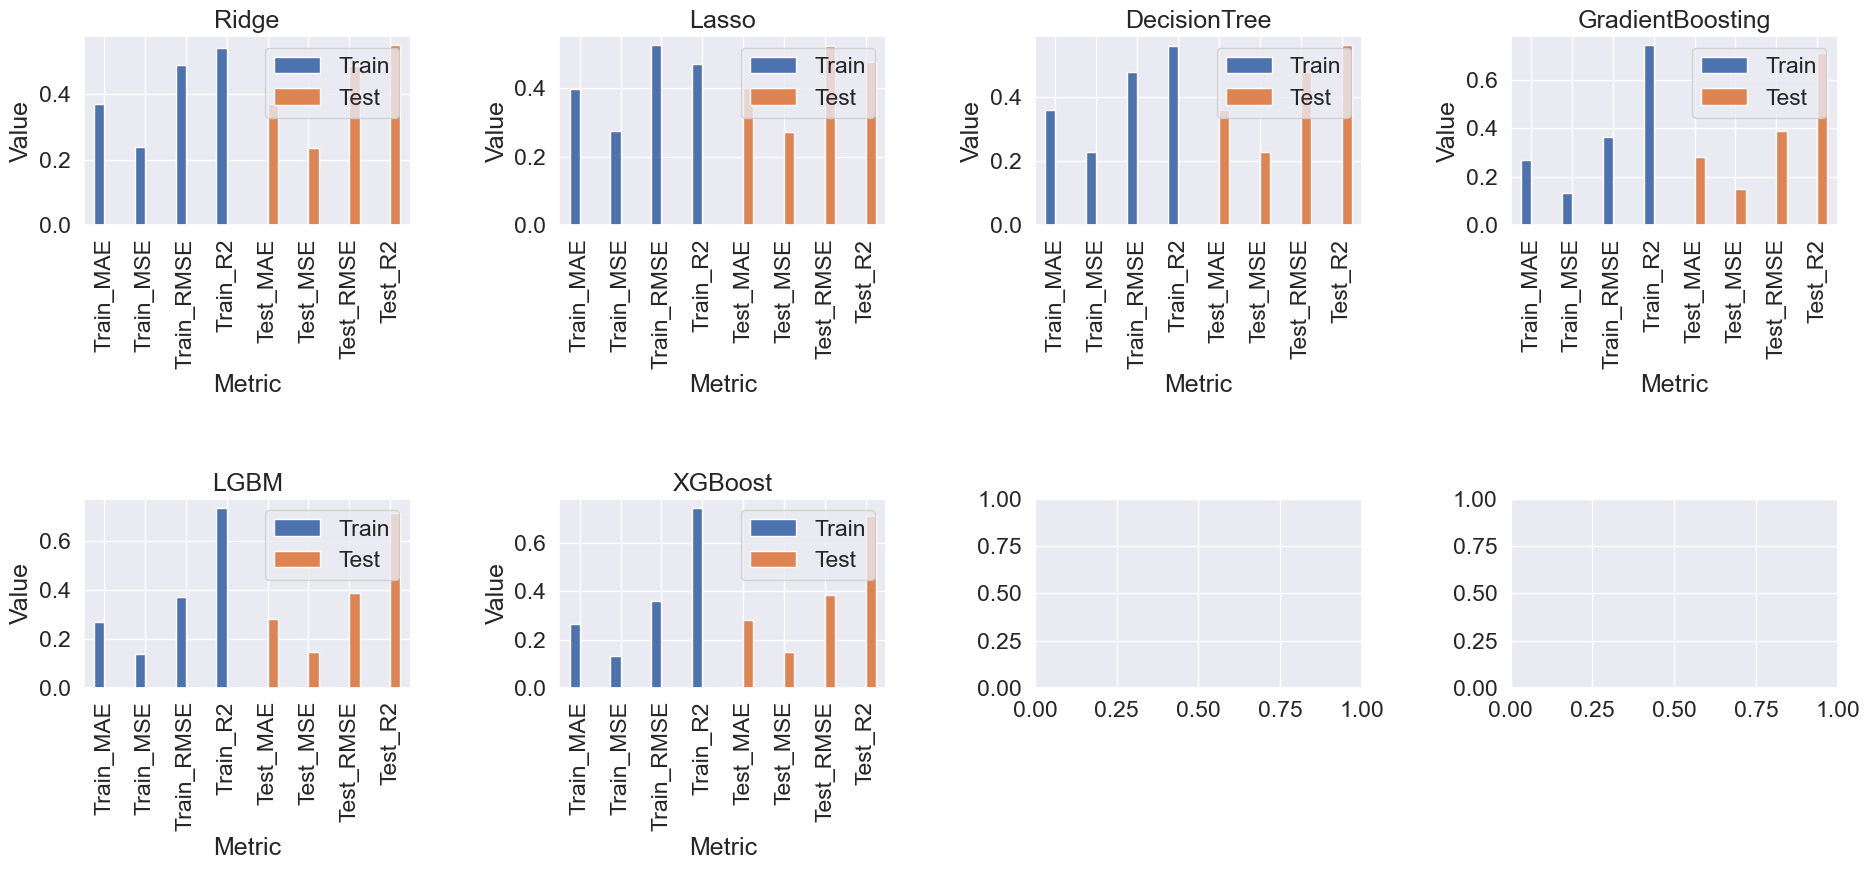

In [189]:
# Plotting with two charts per row and visible x-axis labels
fig, axes = plt.subplots(nrows=2, ncols=len(results_df.columns) // 2, figsize=(20, 10))

for i, model_name in enumerate(results_df.index):
    row_index = i // (len(results_df.columns) // 2)
    col_index = i % (len(results_df.columns) // 2)
    train_metrics = results_df.loc[model_name, ['Train_MAE', 'Train_MSE', 'Train_RMSE', 'Train_R2']]
    test_metrics = results_df.loc[model_name, ['Test_MAE', 'Test_MSE', 'Test_RMSE', 'Test_R2']]
    metrics = pd.concat([train_metrics, test_metrics], axis=1)
    metrics.columns = ['Train', 'Test']
    metrics.plot(kind='bar', ax=axes[row_index, col_index], rot=90, title=model_name)
    axes[row_index, col_index].axhline(0, color='grey', lw=0.5)
    axes[row_index, col_index].set_ylabel('Value')
    axes[row_index, col_index].set_xlabel('Metric')

plt.tight_layout(pad=3.0)
plt.show()


**Conclusion:**

In this project, we explored several regression models to predict a target variable. The models evaluated include Ridge Regression, Lasso Regression, Decision Tree Regression, Gradient Boosting, LightGBM, and XGBoost. Each model was tuned using GridSearchCV to find the best hyperparameters, and their performance was evaluated using various metrics such as Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R-squared (R2) score.

After thorough evaluation, we found that the XGBoost model outperformed the other models based on the provided evaluation metrics. It consistently achieved the lowest error metrics on both the training and testing sets and had the highest R-squared score, indicating superior predictive performance and model fit.

Therefore, we select the XGBoost model as the final model for this project due to its excellent performance in predicting the target variable. It demonstrates robustness and generalizability, making it suitable for deployment in real-world scenarios.

However, it's essential to note that the selection of the best model depends not only on performance metrics but also on other factors such as interpretability, computational efficiency, and scalability. Additionally, further validation and testing may be necessary before deploying the model into production to ensure its reliability and effectiveness in practical applications.
